In [3]:
!git clone https://github.com/amitkaps/recommendation.git

fatal: destination path 'recommendation' already exists and is not an empty directory.


In [4]:
!pip install recommendation 

In [1]:
import sys
sys.path.append('C:/Users/zabolotskiy/recommendation')

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('C:/Users/zabolotskiy/recommendation'))



In [3]:
import sys
sys.path.append('recommendation/reco')

In [11]:
#from preprocess import encode_user_item, random_split, user_split

In [9]:
print(sys.path)

['C:\\Users\\zabolotskiy\\recommendation', 'C:\\Users\\zabolotskiy', 'C:\\Users\\zabolotskiy\\Anaconda3\\python38.zip', 'C:\\Users\\zabolotskiy\\Anaconda3\\DLLs', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib', 'C:\\Users\\zabolotskiy\\Anaconda3', '', 'C:\\Users\\zabolotskiy\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib\\site-packages', 'c:\\windows\\system32\\generativeadversarialusermodel', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\zabolotskiy\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\zabolotskiy\\.ipython', 'C:/Users/zabolotskiy/recommendation', 'recommendation/reco']


In [5]:
import numpy as np
import pandas as pd
from IPython.display import SVG, display
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
%matplotlib inline

In [9]:
#import pymysql
import pandas as pd

In [10]:
#import pymysql

# соеднинение
#conn = pymysql.connect(host='192.168.6.182',user='ml',passwd='ImoralesTuda82',db='metaquotes-demo')

# курсор
#cur = conn.cursor()

# Запрос
# 
#cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'metaquotes-demo'")

# цикл чтения
#for table in [tables[0] for tables in cur.fetchall()]:
#    print(table)

In [12]:
dataset = pd.read_csv('table_orders.csv')
dataset.head()

,time,617777515360944127,617777515367235583,617777516383567871,617777516385140735,617777516387762175,617777516388810751,617777516389335039,617777516392218623,617777516392742911,...,618464969374302207,618464969378234367,618464969583493119,618464969587687423,618464969588735999,618464969642737663,618464969643261951,618464969645883391,618464969647194111,618464969647456255
0,2021-12-11 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-11 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-11 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-11 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-11 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = dataset
Y = dataset

In [18]:
X = np.asarray(dataset)
Y = np.asarray(dataset)

In [33]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed



n_features = 5 
# разбиение выборки на шаги рекурсии
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list() # объявление пустых списков
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in # входные окна истории
		out_end_ix = end_ix + n_steps_out # прогнозируемые шаги
		# проверка диапазона
		if out_end_ix > len(sequences): # проверка на длину
			break
		# объединение начала и конца
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# последовательность
in_seq1 = X[0:1000]#[0:856]


out_seq = Y[0:1000]#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1),30,1,4531)) # разметка данных

out_seq = out_seq.reshape((len(out_seq),1,1,4531))
#out_seq = out_seq.reshape((len(out_seq),1,1,5))




# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, out_seq[0:len(in_seq1)]))
# таймстепы
n_steps_in, n_steps_out = 15, 1
n_features1 = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)





    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
n_features = 10
#visible1 = Input(shape=(n_steps_in,1,1,4531))    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
ConcatMLP1 = layers.Reshape((80,1, 1,1))
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
extract1 = ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 80, 1))(ConcatMLP1)
    
extract2 = layers.Reshape((1,64))(extract1)
extract4 = layers.Reshape((64,))(extract2)
    
   # FL = Flatten()(extract1)
    
RV = vae(extract4)
    
RV2 = layers.Reshape((80,))(RV)
    
Dense_1 = Dense(400, name="Dense1")(RV2)
 
Dense_4 = Dense(1, name="Dense4")(Dense_1)
                         
Dense_6 = layers.Reshape((1,))(Dense_4)                                                                                                                           
    
DotProductMF1 = layers.Reshape((1,))(DotProductMF)
    
    
    # Интеграция MF and MLP paths
Concat = Concatenate(name="ConcatAll")([DotProductMF1, Dense_6])
    
    # Опять в Dense
Pred = Dense(1, name="Pred")(Concat)
 
grnorm = tfa.layers.GroupNormalization(1,-1,0.001,False)(Pred)
output = Dense(1)(grnorm)    
    
    
    
#model = Model(inputs=[visible1], outputs=output)#], outputs=output)
model = Model(inputs=[ConcatMLP1], outputs=output)#
# fit model
model.fit([X],Y, epochs=1, verbose=1,validation_split=0.1, batch_size = 1)#
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))

    

    
    # Compile Model
model.compile(loss='mean_squared_error', optimizer="adagrad")
#model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])   
yhat = model.predict([X], verbose=1,batch_size = 1) #, X3, X4, X5, X6, X7, X8
print(yhat)




 #, X3, X4, X5, X6, X7, X8
print(yhat)  

return model

MemoryError: Unable to allocate 15.2 GiB for an array with shape (970, 15, 31, 1, 4531) and data type object

In [ ]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed


n_features = 5 
# разбиение выборки на шаги рекурсии
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list() # объявление пустых списков
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in # входные окна истории
		out_end_ix = end_ix + n_steps_out # прогнозируемые шаги
		# проверка диапазона
		if out_end_ix > len(sequences): # проверка на длину
			break
		# объединение начала и конца
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# последовательность
in_seq1 = X[0:1000]#[0:856]


out_seq = Y[0:1000]#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1),30,1,4531)) # разметка данных

out_seq = out_seq.reshape((len(out_seq),1,1,4531))
#out_seq = out_seq.reshape((len(out_seq),1,1,5))




# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, out_seq[0:len(in_seq1)]))
# таймстепы
n_steps_in, n_steps_out = 15, 1
n_features1 = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)



MD = vae(ConcatMLP)
MA = model_attention(MD)
output = Dense(1)(grnorm)    
    
    
    
#model = Model(inputs=[visible1], outputs=output)#], outputs=output)
model = Model(inputs=[visible1], outputs=output)#
# fit model
model.fit([X],Y, epochs=1, verbose=1,validation_split=0.1, batch_size = 1)#
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))

    

    
    # Compile Model
model.compile(loss='mean_squared_error', optimizer="adagrad")
#model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])   
yhat = model.predict([X], verbose=1,batch_size = 1) #, X3, X4, X5, X6, X7, X8
print(yhat)




 #, X3, X4, X5, X6, X7, X8
print(yhat)  

return model


In [14]:
#dfs=pd.read_sql_query("SELECT * FROM mt5_deals LIMIT 1000000",conn)
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
dfs.head()

,Deal,Timestamp,ExternalID,Login,Dealer,Order,Action,Entry,Reason,Digits,DigitsCurrency,ContractSize,Time,TimeMsc,Symbol,Price,VolumeExt,Profit,Storage,Commission,Fee,RateProfit,RateMargin,ExpertID,PositionID,Comment,ProfitRaw,PricePosition,PriceSL,PriceTP,VolumeClosedExt,TickValue,TickSize,Flags,Gateway,PriceGateway,ModifyFlags,MarketBid,MarketAsk,MarketLast,Volume,VolumeClosed,ApiData
0,224,128969977978467950,,1052,0,0,2,0,0,2,2,0.0,2009-09-09 21:23:17,1970-01-01,,0.0000,0,100000.0,0.0,0.0,0.0,0.0,0.0000,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,0,0,[]
1,225,128969983226237540,,1052,0,146,0,0,0,4,2,100000.0,2009-09-09 21:32:02,1970-01-01,EURUSD,1.4547,100000000,0.0,0.0,0.0,0.0,0.0,1.4547,0,0,,0.0,0.0,1.4536,1.4552,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,10000,0,[]
2,226,128969983910666390,,1052,0,147,1,1,0,4,2,100000.0,2009-09-09 21:33:11,1970-01-01,EURUSD,1.4541,50000000,-30.0,0.0,0.0,0.0,1.0,1.4541,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,5000,0,[]
3,227,128969985477099335,,1052,0,148,1,1,0,4,2,100000.0,2009-09-09 21:35:47,1970-01-01,EURUSD,1.4542,10000000,-5.0,0.0,0.0,0.0,1.0,1.4542,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,1000,0,[]
4,231,128969993508186875,,1052,0,151,1,1,0,4,2,100000.0,2009-09-09 21:49:10,1970-01-01,EURUSD,1.4556,40000000,36.0,0.0,0.0,0.0,1.0,1.4556,0,0,,0.0,0.0,0.0000,0.0000,0,0.0,0.0,0,,0.0,0,0.0,0.0,0.0,4000,0,[]


In [15]:
r = ["Login", "ExpertID", "Profit", "Timestamp","Action","Reason","Order", "Action", "Entry", "Reason", "Digits"]
i = ['ExpertID']
ii = ['ExpertID',"Action"]
df_ratings = dfs[r]
df_items = dfs[i]


In [16]:


# Data Encoding
DATA, user_encoder, item_encoder = encode_user_item(df_ratings, "Login", "ExpertID", "Profit", "Timestamp","Order", "Action", "Entry", "Reason", "Digits")



Number of users:  2719
Number of items:  1195


In [17]:


DATA.head()



,Login,ExpertID,RATING,TIMESTAMP,Action,Reason,Order,Action,Entry,Reason,Digits,USER,ITEM
0,1052,0,100000.0,128969977978467950,2,0,0,2,0,0,2,2,0
1,1052,0,0.0,128969983226237540,0,0,146,0,0,0,4,2,0
2,1052,0,-30.0,128969983910666390,1,0,147,1,1,0,4,2,0
3,1052,0,-5.0,128969985477099335,1,0,148,1,1,0,4,2,0
4,1052,0,36.0,128969993508186875,1,0,151,1,1,0,4,2,0


In [18]:


n_users = DATA.USER.nunique()
n_items = DATA.ITEM.nunique()
n_users, n_items



(2719, 1195)

In [19]:
#df_items = 

In [20]:
max_rating = DATA.RATING.max()
min_rating = DATA.RATING.min()
min_rating, max_rating

(-5956680.51, 10000000.0)

In [21]:


# Data Splitting
#train, val, test = user_split(DATA, [0.6, 0.2, 0.2])
train, test = user_split(DATA, [0.9, 0.1])



In [22]:
train.shape, test.shape

((900117, 14), (99883, 14))

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import sys
sys.path.append("reco/")

In [25]:
import sys
sys.path.append("recommendation/reco") # go to parent dir


In [26]:
%pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [45]:


from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Add, Lambda, Activation, Reshape, Concatenate, Dense, Dropout
from keras.regularizers import l2
from keras.constraints import non_neg
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
#from keras.optimizers import Adam
#from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import vis



In [46]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox


In [29]:
def NNMF_Bias(n_users, n_items, n_factors):
    
    # Item Layer
    item_input = Input(shape=[1], name='Item')
    item_embedding = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-5),
                               embeddings_constraint= non_neg(),
                               name='ItemEmbedding')(item_input)
    item_vec = Flatten(name='FlattenItemE')(item_embedding)
    
    # Item Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User Layer
    user_input = Input(shape=[1], name='User')
    user_embedding = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-5), 
                               embeddings_constraint= non_neg(),
                               name='UserEmbedding')(user_input)
    user_vec = Flatten(name='FlattenUserE')(user_embedding)
    
    # User Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Dot Product of Item and User & then Add Bias
    DotProduct = Dot(axes=1, name='DotProduct')([item_vec, user_vec])
    
    DotProduct2 = Dot(axes=1, name='DotProduct2')([item_bias_vec, user_bias_vec])
    
    AddBias = Add(name="AddBias")([DotProduct,DotProduct2])
    
    # Scaling for each user
    y = Activation('sigmoid')(AddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Model Creation
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adagrad")
    
    return model

In [30]:
def NNMF_Bias(n_users, n_items, n_factors):
    
    # Item Layer
    item_input = Input(shape=[1], name='Item')
    item_embedding = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-5),
                               embeddings_constraint= non_neg(),
                               name='ItemEmbedding')(item_input)
    item_vec = Flatten(name='FlattenItemE')(item_embedding)
    
    # Item Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User Layer
    user_input = Input(shape=[1], name='User')
    user_embedding = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-5), 
                               embeddings_constraint= non_neg(),
                               name='UserEmbedding')(user_input)
    user_vec = Flatten(name='FlattenUserE')(user_embedding)
    
    # User Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Dot Product of Item and User & then Add Bias
    DotProduct = Dot(axes=1, name='DotProduct')([item_vec, user_vec])
    
    DotProduct2 = Dot(axes=1, name='DotProduct2')([item_bias_vec, user_bias_vec])
    
    AddBias = Add(name="AddBias")([DotProduct,DotProduct2])
    
    # Scaling for each user
    y = Activation('sigmoid')(AddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Model Creation
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adagrad")
    
    return model

In [31]:
X = dfs[i]
y = dfs[i]
y1 = dfs[r]

In [32]:
X.shape
n_factors = 40

In [33]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Add, Lambda, Activation, Reshape, Concatenate, Dense, Dropout

In [34]:
import sys
sys.path.append('C:/Users/zabolotskiy/PSOkeras/')

In [35]:
import sys
sys.path.append('C:/Users/zabolotskiy/PSOkeras/psokeras')

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from psokeras import Optimizer


In [39]:
n_factors = 40
model = NNMF_Bias(n_users, n_items, n_factors)

In [40]:


%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=16, verbose=1, validation_split=0.1)

Epoch 1/16
6329/6329 [==============================] - 13s 2ms/step - loss: 3790396456960.0000 - val_loss: 3366953156608.0000
Epoch 2/16
6329/6329 [==============================] - 11s 2ms/step - loss: 3269201756160.0000 - val_loss: 2833492475904.0000
Epoch 3/16
6329/6329 [==============================] - 11s 2ms/step - loss: 2827955208192.0000 - val_loss: 2395781464064.0000
Epoch 4/16
6329/6329 [==============================] - 11s 2ms/step - loss: 2453877817344.0000 - val_loss: 2037942976512.0000
Epoch 5/16
6329/6329 [==============================] - 11s 2ms/step - loss: 2139142356992.0000 - val_loss: 1748325367808.0000
Epoch 6/16
6329/6329 [==============================] - 11s 2ms/step - loss: 1876369735680.0000 - val_loss: 1516592824320.0000
Epoch 7/16
6329/6329 [==============================] - 11s 2ms/step - loss: 1658587840512.0000 - val_loss: 1333487468544.0000
Epoch 8/16
6329/6329 [==============================] - 11s 2ms/step - loss: 1479288160256.0000 - val_loss: 119

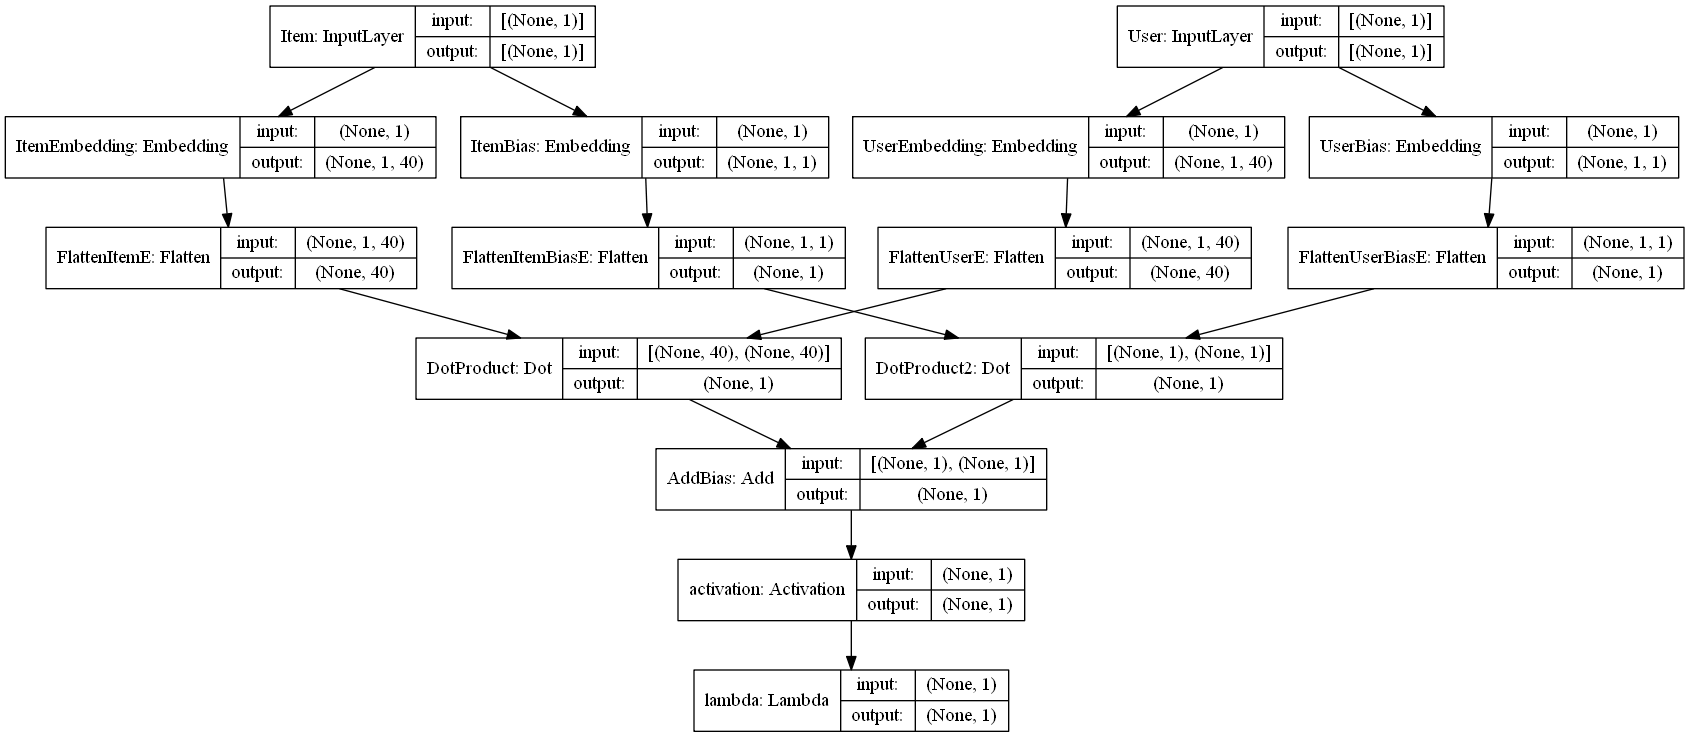

In [41]:

plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/NNMF-Bias.png" )

In [186]:
vis.metrics(output.history)

alt.FacetChart(...)

In [187]:

score = model.evaluate([test.USER, test.ITEM], test.RATING, verbose=1)
score


3122/3122 [==============================] - 27s 9ms/step - loss: 365486752.0000


365486752.0

In [188]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k



In [190]:
item_embedding = get_embedding(model, "ItemEmbeddingMLP")
user_embedding = get_embedding(model, "UserEmbeddingMF")

In [191]:


%%time
predictions = get_predictions(model, DATA)



Wall time: 14min 5s


In [192]:


predictions.head()



,USER,ITEM,RATING_PRED
0,2,0,2423.5
1,2,237,-12840.5
2,2,205,11314.5
3,2,427,-6049.5
4,2,4,-20016.5


In [34]:
def Deep_MF(n_users, n_items, n_factors): # простая LSTM
    
    # Роботы и иные факторы
    item_input = Input(shape=[1], name='Item')
    item_embedding = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='glorot_normal',
                               name='ItemEmbedding')(item_input)
    item_vec = Flatten(name='FlattenItemE')(item_embedding)
    
    
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-6), 
                          embeddings_initializer='glorot_normal',
                          name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # Пользователи или трейдеры
    user_input = Input(shape=[1], name='User')
    user_embedding = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='glorot_normal',
                               name='UserEmbedding')(user_input)
    user_vec = Flatten(name='FlattenUserE')(user_embedding)
    
    # смещения
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-6), 
                        embeddings_initializer='glorot_normal',
                          name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

  
    Concat = Concatenate(name='Concat')([item_vec, user_vec])
    ConcatDrop = Dropout(0.5)(Concat)

    kernel_initializer='he_normal'
    

    
   # Concat = Concat.reshape(None,100,1,1,1)
    
    #Concat = Concat.reshape((Concat.shape[0], 1, 1, 1, 5))
    
    #Concat=LSTM(100,shape = (100,1))(Concat)
    Dense_1 = Dense(40, kernel_initializer='glorot_normal', name="Dense_1")(Concat)
    Dense_2_Drop = Dropout(0.5)(Dense_1)    
    Dense_3 = Dense(10, kernel_initializer='glorot_normal', name="Dense_3")(Dense_2_Drop)
    Dense_4_Drop = Dropout(0.5)(Dense_3)
    Dense_8 = Dense(1, kernel_initializer='glorot_normal', name="Dense_8")(Dense_4_Drop)
    # предсказанрие со смещением
    
    AddBias = Add(name="AddBias")([Dense_8, item_bias_vec, user_bias_vec])
    
    
    
    
    y = Activation('sigmoid')(AddBias) 
    
    # масштабирование
    
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    
    model = Model([user_input, item_input], rating_output)
    
   
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
    
    return model

In [47]:
n_factors = 20
model = Deep_MF(n_users, n_items, n_factors)

In [48]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
ItemEmbedding (Embedding)       (None, 1, 20)        23900       Item[0][0]                       
__________________________________________________________________________________________________
UserEmbedding (Embedding)       (None, 1, 20)        54820       User[0][0]                       
____________________________________________________________________________________________

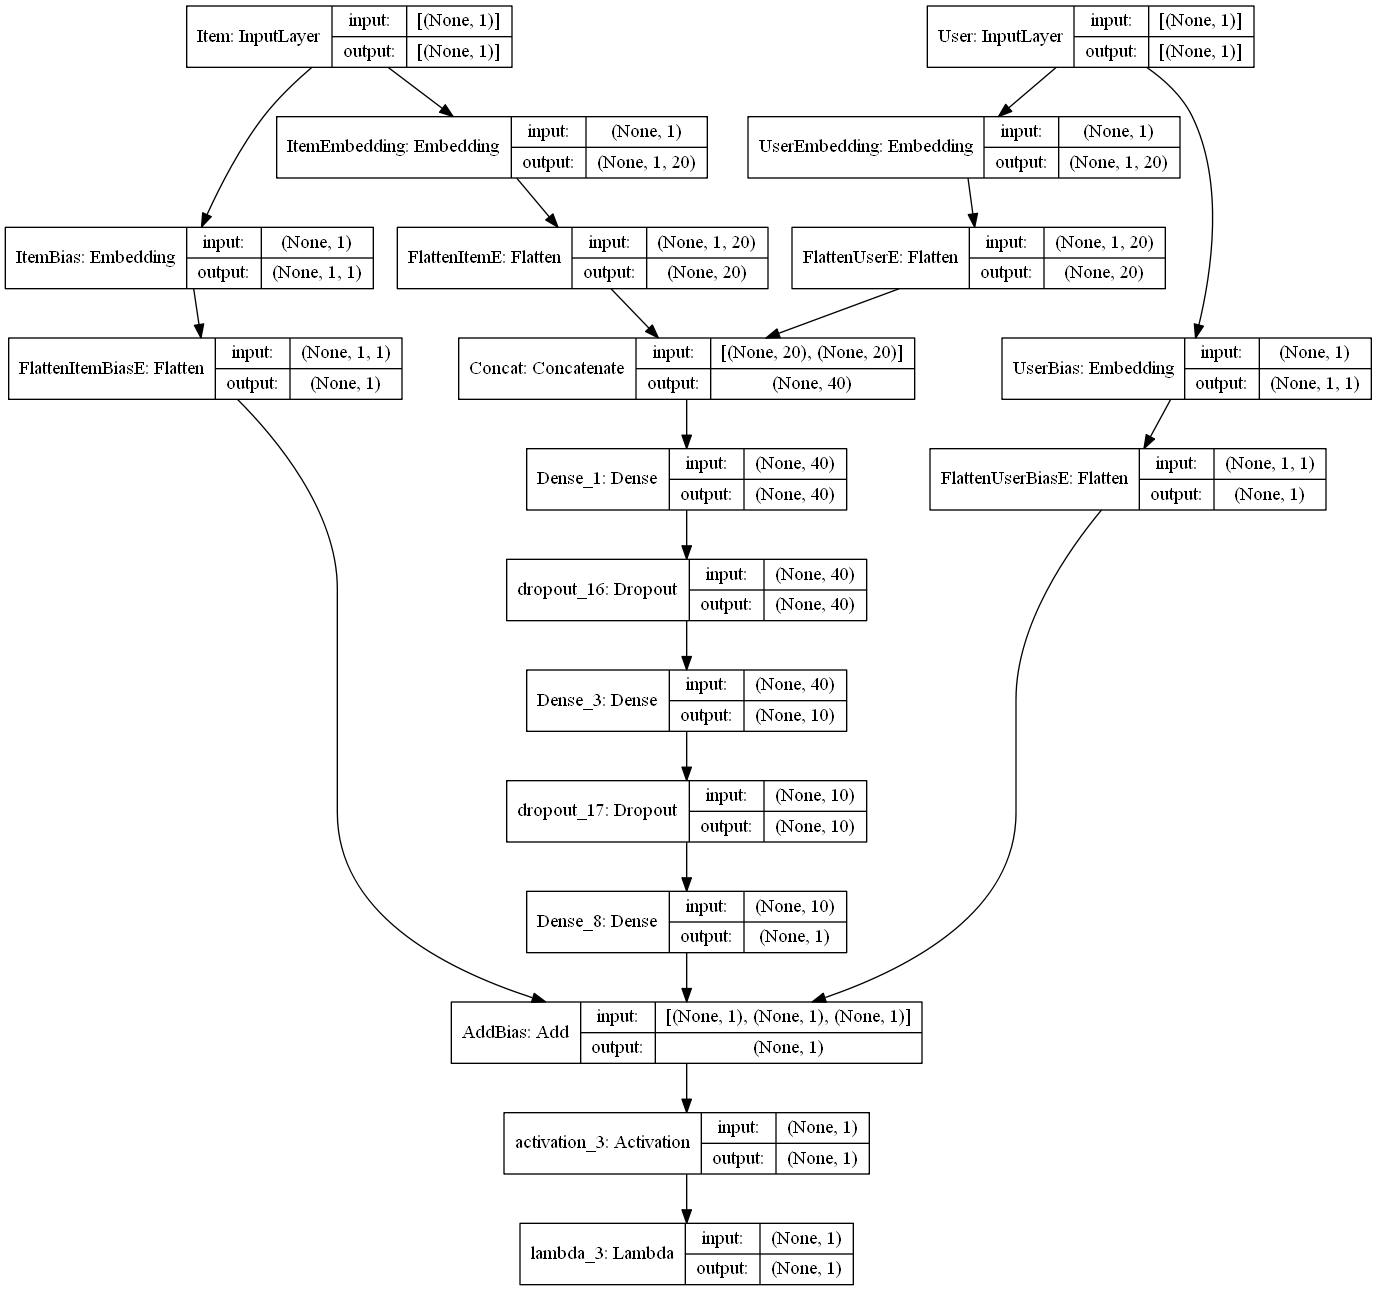

In [49]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [50]:


%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=8, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))

Epoch 1/8
7033/7033 [==============================] - 15s 2ms/step - loss: 26216038400.0000 - val_loss: 473283584.0000
Epoch 2/8
7033/7033 [==============================] - 16s 2ms/step - loss: 1043837504.0000 - val_loss: 366522944.0000
Epoch 3/8
7033/7033 [==============================] - 13s 2ms/step - loss: 987709632.0000 - val_loss: 337811392.0000
Epoch 4/8
7033/7033 [==============================] - 14s 2ms/step - loss: 990792768.0000 - val_loss: 344815648.0000
Epoch 5/8
7033/7033 [==============================] - 16s 2ms/step - loss: 969784192.0000 - val_loss: 546765952.0000
Epoch 6/8
7033/7033 [==============================] - 15s 2ms/step - loss: 980055232.0000 - val_loss: 361436416.0000
Epoch 7/8
7033/7033 [==============================] - 17s 2ms/step - loss: 967603136.0000 - val_loss: 395813344.0000
Epoch 8/8
7033/7033 [==============================] - 15s 2ms/step - loss: 974473024.0000 - val_loss: 337470112.0000
Wall time: 2min


In [51]:
vis.metrics(output.history)

alt.FacetChart(...)

In [54]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k
item_embedding_mf = get_embedding(model, "ItemEmbedding")
user_embedding_mf = get_embedding(model, "UserEmbedding")
item_embedding_mlp = get_embedding(model, "ItemEmbedding")
user_embedding_mlp = get_embedding(model, "UserEmbedding")


In [56]:
item_embedding = np.mean([item_embedding_mf,item_embedding_mlp], axis=0)
user_embedding = np.mean([user_embedding_mf,user_embedding_mlp], axis=0)



In [59]:
score = model.evaluate([test.USER, test.ITEM], test.RATING, verbose=1)
score



3122/3122 [==============================] - 4s 1ms/step - loss: 337455456.0000


337455456.0

In [61]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k


In [62]:
item_embedding = get_embedding(model, "ItemEmbedding")
user_embedding = get_embedding(model, "UserEmbedding")

In [63]:


%%time
predictions = get_predictions(model, DATA)



Wall time: 2min 47s


In [64]:


predictions.head()



,USER,ITEM,RATING_PRED
0,2,0,6161.5
1,2,237,3711.5
2,2,205,7206.5
3,2,427,7629.0
4,2,4,11538.0


In [66]:
ranking_topk = recommend_topk(model, DATA, train, k=5)

In [67]:
eval_precision = precision_at_k(test, ranking_topk, k=10)
eval_recall = recall_at_k(test, ranking_topk, k=10)
eval_ndcg = ndcg_at_k(test, ranking_topk, k=10)

print("NDCG@K:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

NDCG@K:	0.000662
Precision@K:	0.000369
Recall@K:	0.000407


In [68]:


from recommend import get_similar, show_similar



In [ ]:
%%time
item_distances, item_similar_indices = get_similar(item_embedding, 5)

In [ ]:
item_similar_indices

In [ ]:
from recommend import get_similar, show_similar

item_distances, item_similar_indices = get_similar(item_embedding, 5)
item_similar_indices

In [44]:
from keras.layers import TimeDistributed
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten, Dense, Reshape

In [28]:


def Neural_CF(n_users, n_items, n_factors):
    
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 1
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80, 1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = LSTM(40, return_sequences=True)(ConcatMLP1)
    extract2 = LSTM(20, return_sequences=True)(extract1)
    
    extract3 = LSTM(10, return_sequences=True)(extract2)
    extract4 = LSTM(4, return_sequences=True)(extract3)
   # classification output
    class11 = LSTM(10)(extract4)
    class12 = Dense(10, activation='relu')(class11)
    output1 = Dense(1, activation='sigmoid')(class12)
    # 
    
    #output2 = TimeDistributed(Dense(1, activation='linear'))(class11)
    Dense_1 = Dense(400, name="Dense1")(output1 )
    
    Dense_2 = Dense(20, name="Dense2")(Dense_1)

    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_2])
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [29]:

n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)

In [ ]:
#  x = Reshape(input_shape + (1, ), input_shape=input_shape)(inputs) + dimension

In [28]:
def Neural_CF(n_users, n_items, n_factors):
    
   
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
  
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
  
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
   
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    
    Dense_1 = Dense(400, name="Dense1")(ConcatMLP)
    Dense_2 = Dense(200, name="Dense2")(Dense_1)
    Dense_3 = Dense(100, name="Dense3")(Dense_2)
    Dense_4 = Dense(20, name="Dense4")(Dense_3)

   
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_4])
    
    
    Pred = Dense(1, name="Pred")(Concat)
    

    
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

   
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
  
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
  
    model = Model([user_input, item_input], rating_output)
    
  
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [70]:
# Load Python libraries
from sklearn import   metrics, ensemble
import xgboost as xgb
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [197]:
import math
import csv
import random
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation, linear_model
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [126]:
def Neural_CF(n_users, n_items, n_factors):
    
    from sklearn import   metrics, ensemble
    import xgboost as xgb
    from catboost import CatBoostClassifier
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import warnings
    from sklearn.model_selection import train_test_split
    
    
    
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
  
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
  
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
  
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    
    Dense_1 = Dense(400, name="Dense1")(ConcatMLP)
    
    Dense_2 = Dense(200, name="Dense2")(Dense_1)
    Dense_3 = Dense(100, name="Dense3")(Dense_2)
    Dense_4 = Dense(20, name="Dense4")(Dense_3)
    #Dense_5 = Catboost(n_users, n_items)(Dense_4)
    
   
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_4])
    
   
    Pred = Dense(1, name="Pred")(Concat)
    


    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

 
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
   
    model = Model([user_input, item_input], rating_output)
    

    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [ ]:
vis.metrics(output.history)

In [ ]:
# разбиение train- test
target = y
train_data, test_data, train_labels, test_labels = train_test_split(Xb, target, train_size=0.8,test_size=0.2,random_state=42) #cross_validation.train_test_split(Xb, target, test_size = 0.3)


#del df


In [ ]:
tf.keras.layers.Reshape(target_shape, **kwargs)


In [127]:


n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)



In [128]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
ItemEmbeddingMLP (Embedding)    (None, 1, 40)        47800       Item[0][0]                       
__________________________________________________________________________________________________
UserEmbeddingMLP (Embedding)    (None, 1, 40)        109640      User[0][0]                       
____________________________________________________________________________________________

In [103]:
import sys

sys.path.append("recommendation/reco") # go to parent dir") # go to parent dir

In [104]:
import sys

sys.path.append('recommendation/') # go to parent dir") # go to parent dir

In [105]:



#LSTM интеграция в ядро. 



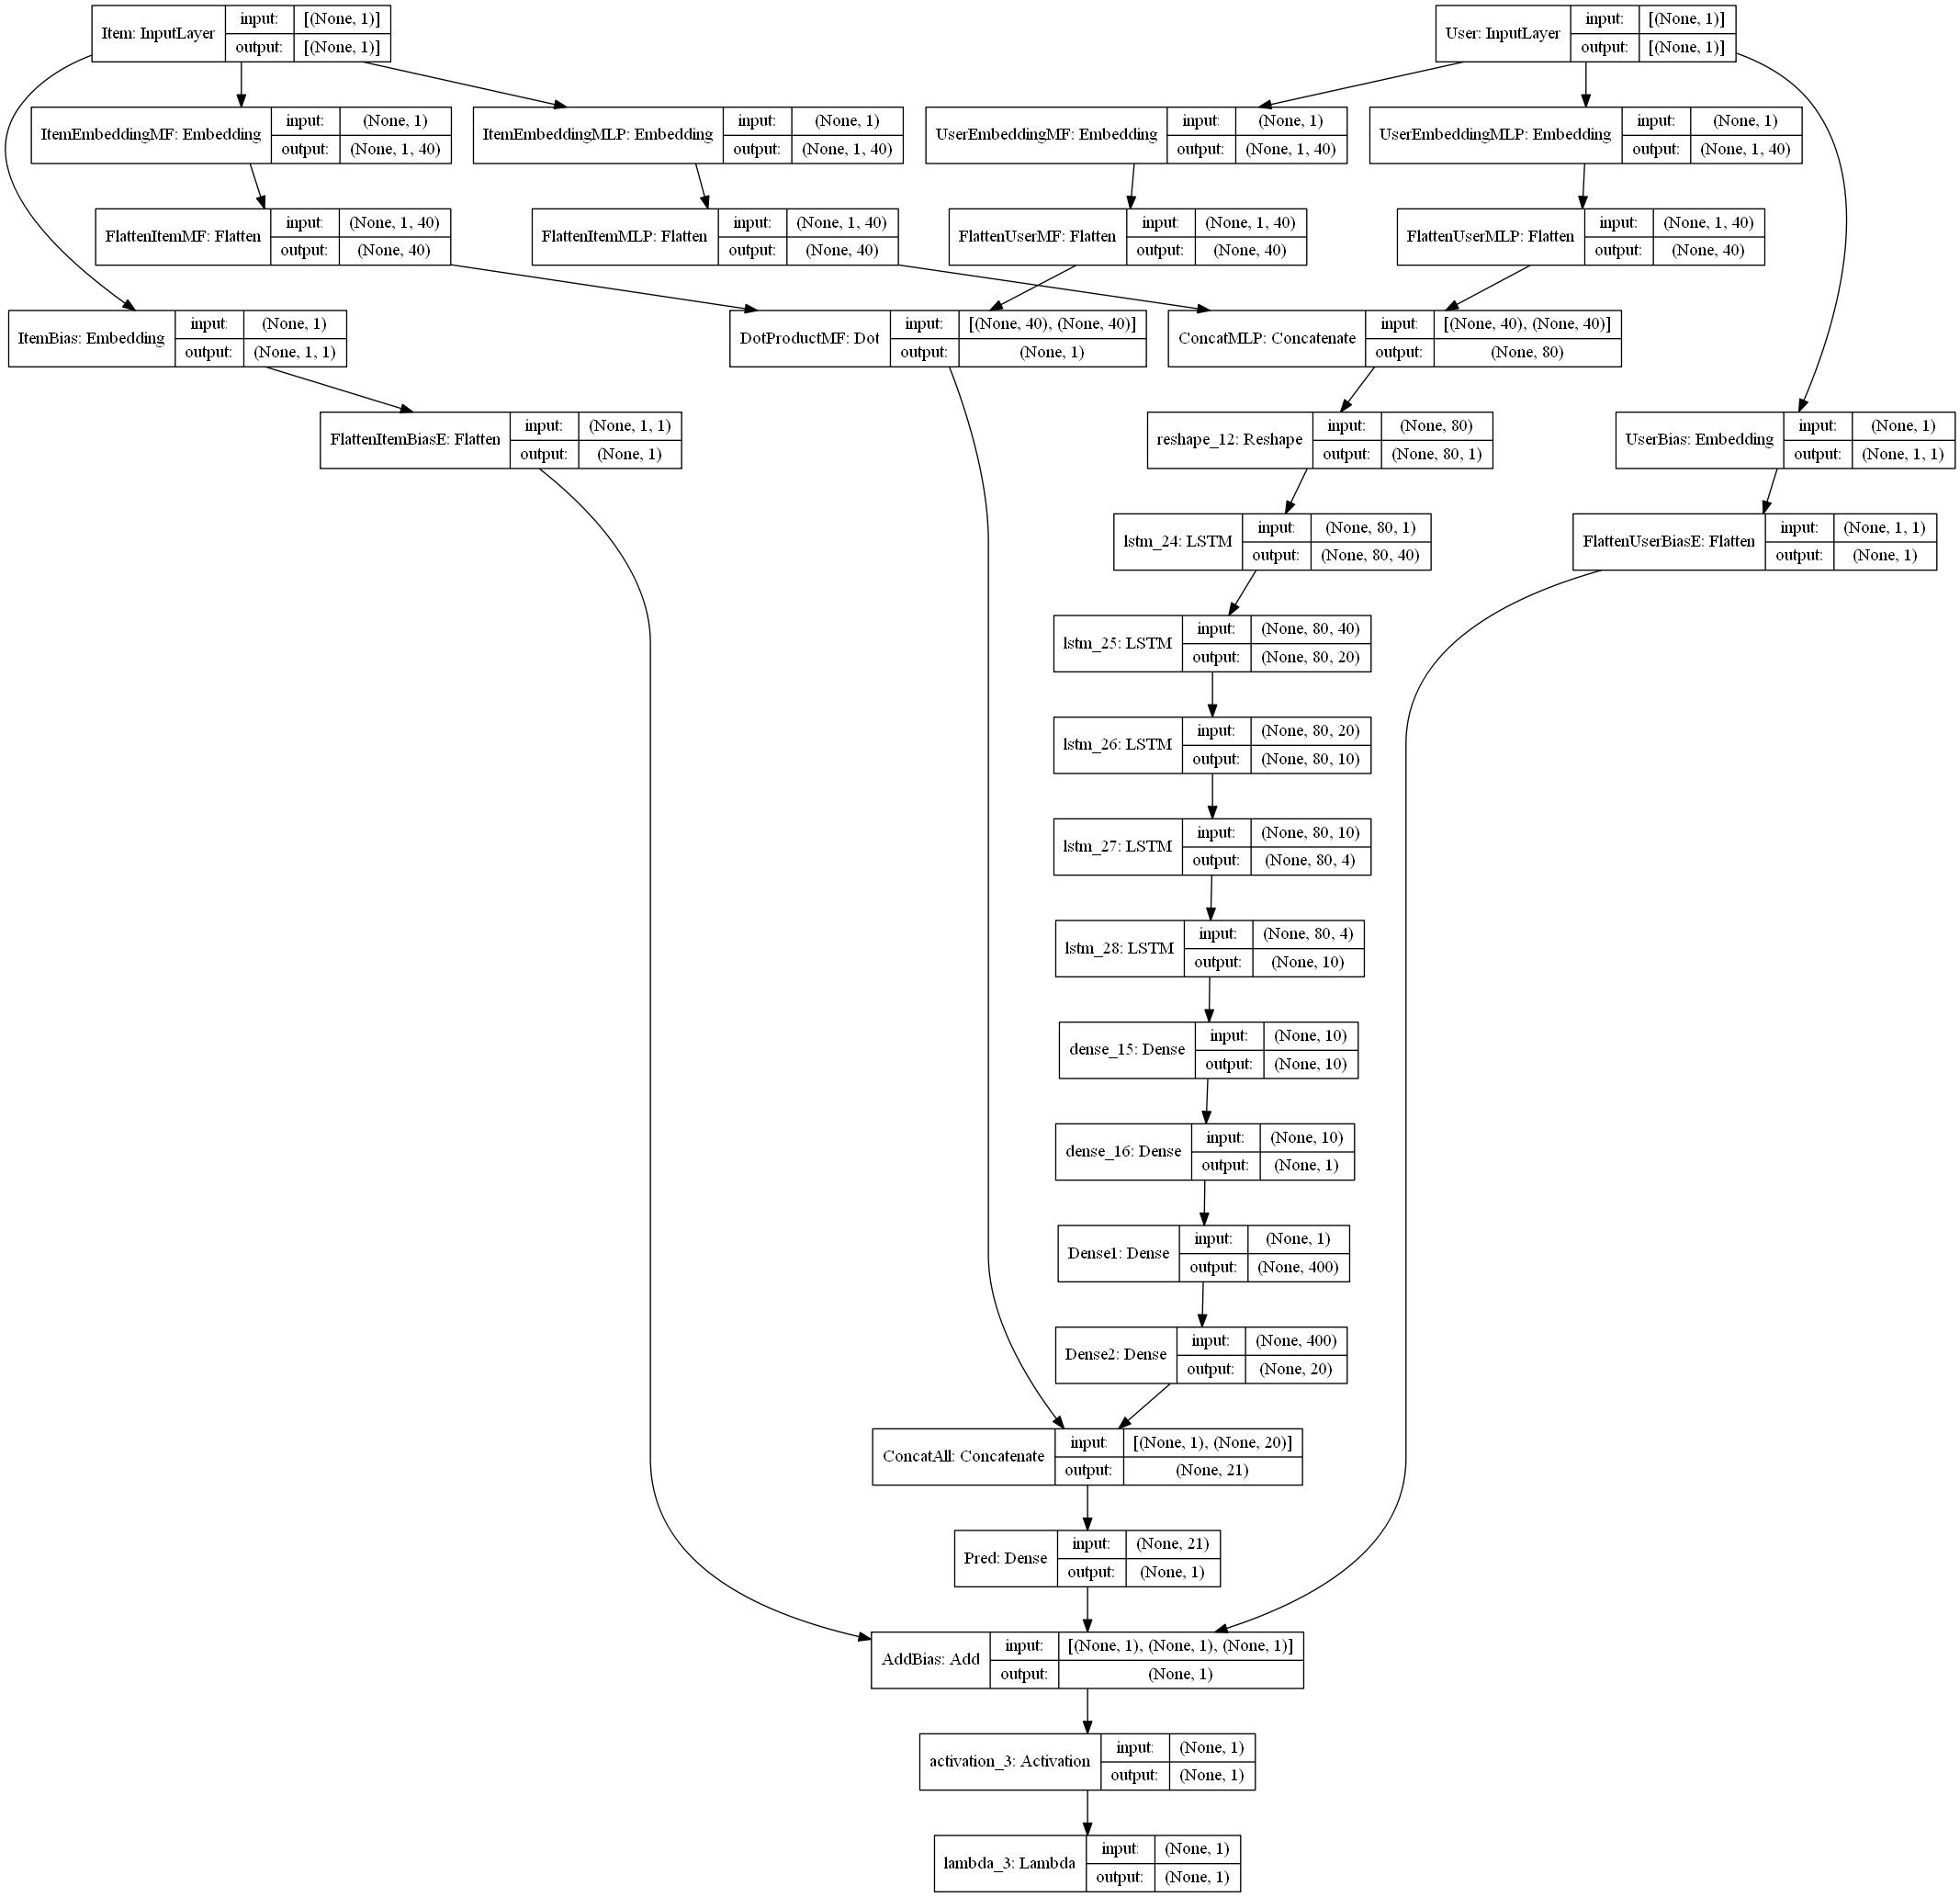

In [122]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [124]:


%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=8, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))



Epoch 1/8
7033/7033 [==============================] - 1492s 212ms/step - loss: 1152236416.0000 - val_loss: 414061408.0000
Epoch 2/8
7033/7033 [==============================] - 53850s 8s/step - loss: 1109477248.0000 - val_loss: 280982240.0000
Epoch 3/8
7033/7033 [==============================] - 1520s 216ms/step - loss: 1056341568.0000 - val_loss: 291391008.0000
Epoch 4/8
7033/7033 [==============================] - 1634s 232ms/step - loss: 1040976128.0000 - val_loss: 323388448.0000
Epoch 5/8
7033/7033 [==============================] - 1563s 222ms/step - loss: 1033137344.0000 - val_loss: 279963360.0000
Epoch 6/8
7033/7033 [==============================] - 1557s 221ms/step - loss: 1006373120.0000 - val_loss: 717384704.0000
Epoch 7/8
7033/7033 [==============================] - 1566s 223ms/step - loss: 1008583616.0000 - val_loss: 276054240.0000
Epoch 8/8
7033/7033 [==============================] - 1568s 223ms/step - loss: 992370816.0000 - val_loss: 275235232.0000
Wall time: 17h 59mi

In [56]:
vis.metrics(output.history)

alt.FacetChart(...)

In [109]:
%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
5626/5626 [==============================] - 422s 75ms/step - loss: 1109186176.0000 - val_loss: 363537824.0000
Epoch 2/5
5626/5626 [==============================] - 427s 76ms/step - loss: 1106986752.0000 - val_loss: 381499232.0000
Epoch 3/5
5626/5626 [==============================] - 373s 66ms/step - loss: 1105407872.0000 - val_loss: 369455040.0000
Epoch 4/5
5626/5626 [==============================] - 419s 75ms/step - loss: 1105404544.0000 - val_loss: 369601088.0000
Epoch 5/5
5626/5626 [==============================] - 418s 74ms/step - loss: 1109927936.0000 - val_loss: 375445440.0000
Wall time: 34min 20s


In [110]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k

In [111]:
item_embedding_mf = get_embedding(model, "ItemEmbeddingMF")
user_embedding_mf = get_embedding(model, "UserEmbeddingMF")
item_embedding_mlp = get_embedding(model, "ItemEmbeddingMLP")
user_embedding_mlp = get_embedding(model, "UserEmbeddingMLP")

In [112]:


item_embedding = np.mean([item_embedding_mf,item_embedding_mlp], axis=0)
user_embedding = np.mean([user_embedding_mf,user_embedding_mlp], axis=0)



In [113]:
%%time
predictions = get_predictions(model, DATA)

Wall time: 29min 47s


In [125]:


predictions.head()



,USER,ITEM,RATING_PRED
0,2,0,12876.5
1,2,237,17978.0
2,2,205,23635.0
3,2,427,7542.0
4,2,4,11721.0


In [126]:
%%time
# Recommendation for Top10K
ranking_topk = recommend_topk(model, DATA, train, k=5)

Wall time: 2min 44s


In [127]:
eval_precision = precision_at_k(test, ranking_topk, k=10)
eval_recall = recall_at_k(test, ranking_topk, k=10)
eval_ndcg = ndcg_at_k(test, ranking_topk, k=10)

print("NDCG@K:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

NDCG@K:	0.000000
Precision@K:	0.000000
Recall@K:	0.000000


In [129]:
from recommend import get_similar, show_similar

In [130]:
%%time
item_distances, item_similar_indices = get_similar(item_embedding, 5)

Wall time: 130 ms


In [131]:


item_similar_indices



array([[   0, 1174,  181,  848,  171],
       [   1, 1174,  181,  848,  171],
       [   2,    0,  171, 1174,  181],
       ...,
       [1192,  205,    1,  360,  298],
       [1193,    0, 1174,  181,  171],
       [1194,    0,  171, 1174,  181]], dtype=int64)

In [47]:
from keras.layers import ConvLSTM2D

In [62]:


def Neural_CF(n_users, n_items, n_factors):
    
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 1
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80,1, 1,1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 80, 1))(ConcatMLP1)
  
    
    
    Dense_2 = Dense(20, name="Dense2")(extract1)
    
    DotProductMF1 = layers.Reshape((1,1,1))(DotProductMF)
    
    
    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF1, Dense_2])
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [63]:

n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)

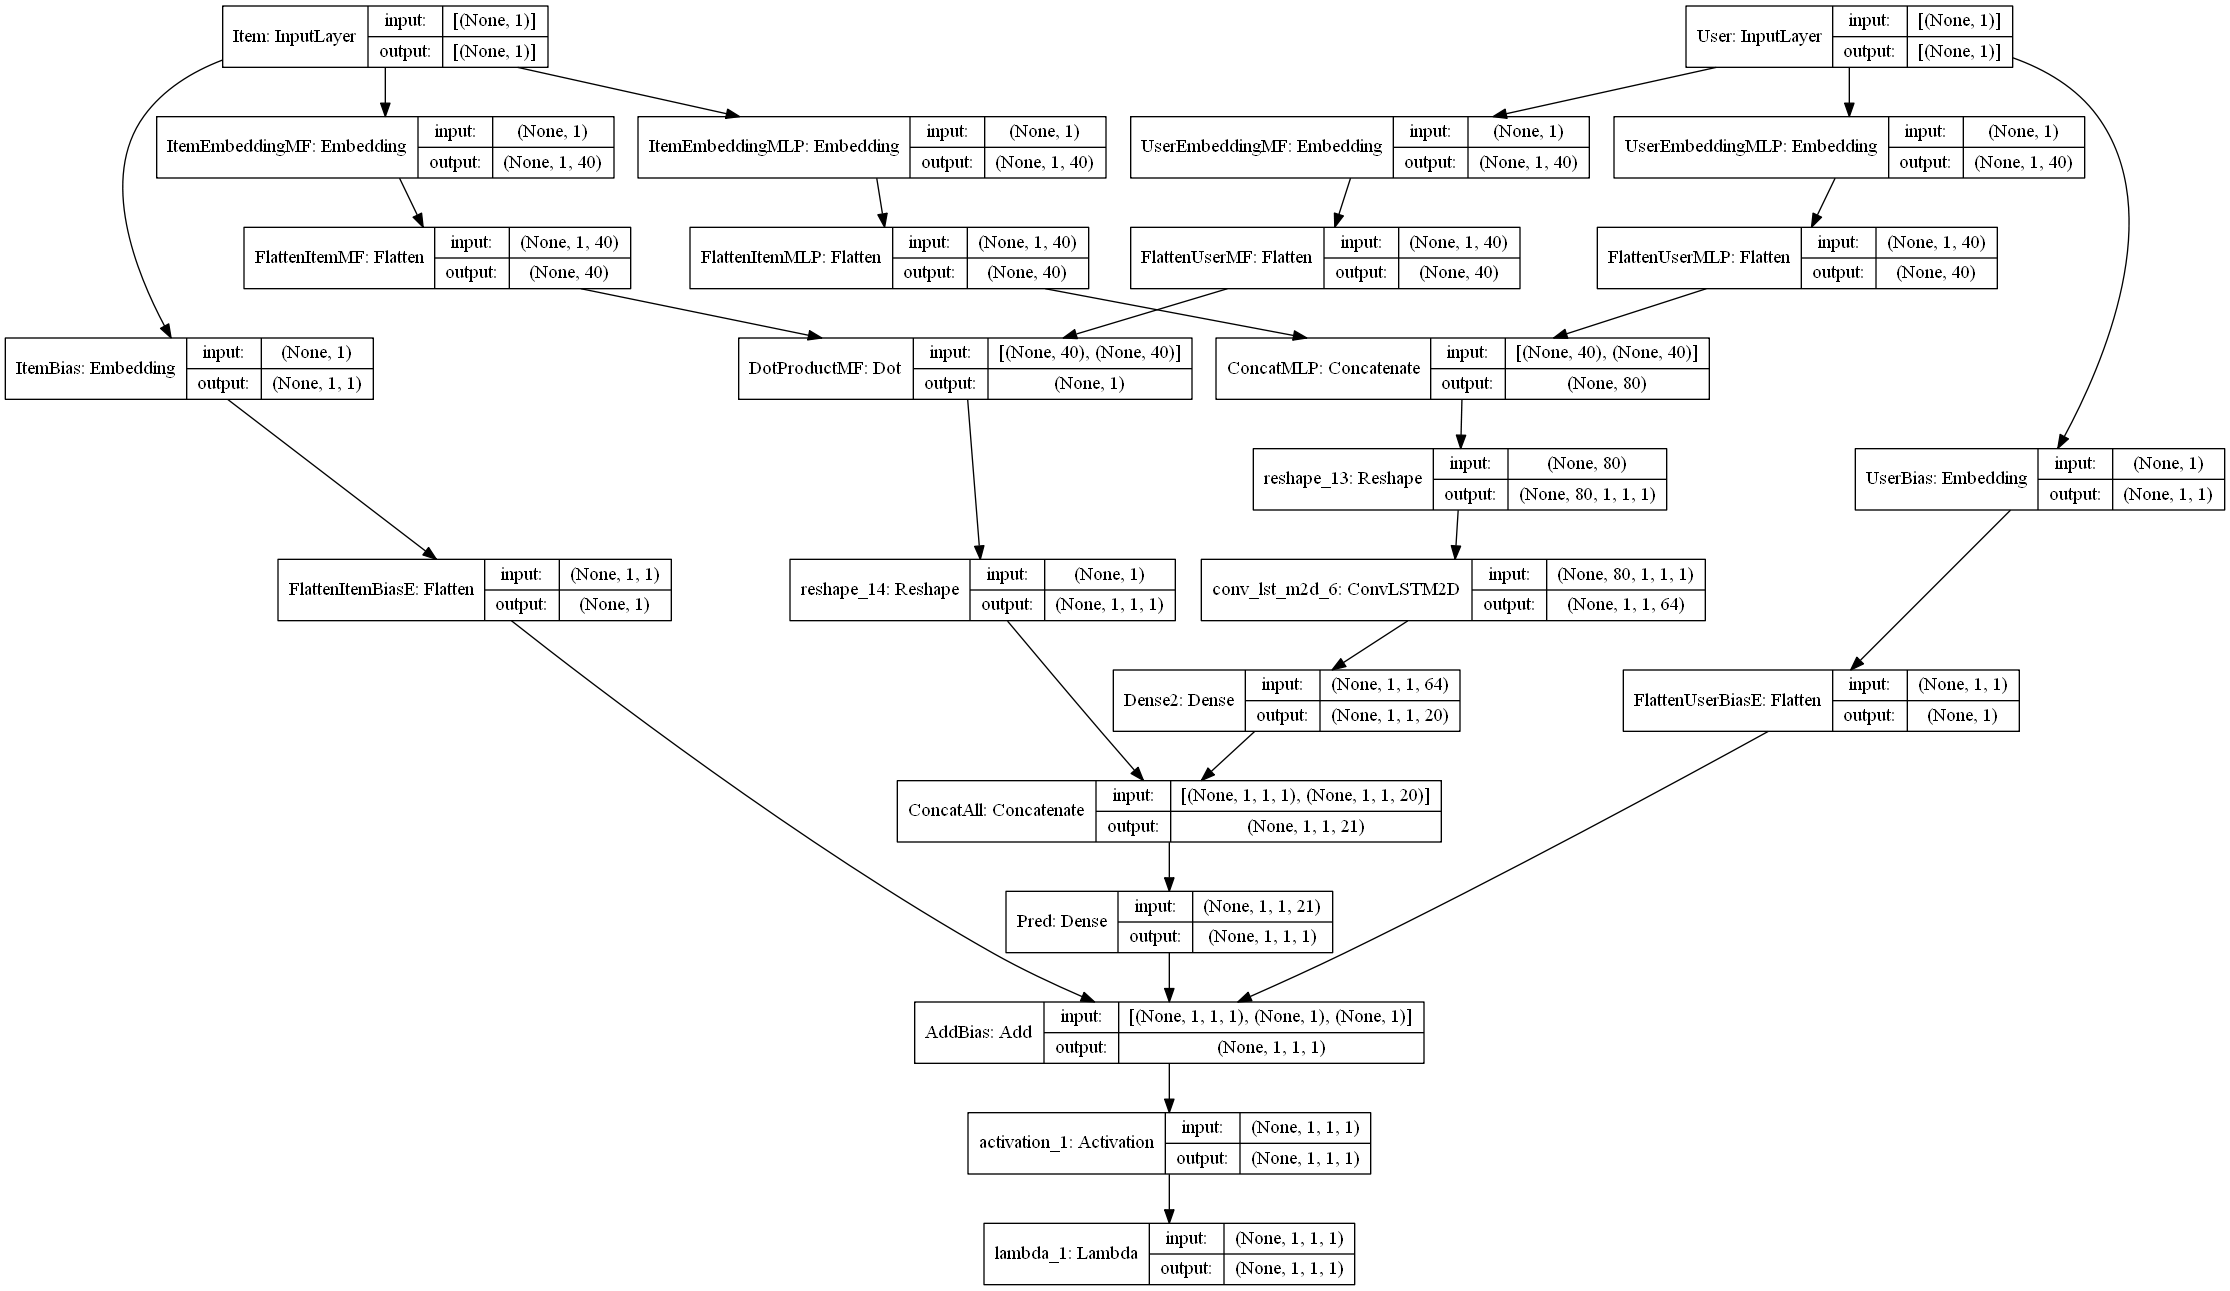

In [64]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [65]:

%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=4, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))

Epoch 1/4
7033/7033 [==============================] - 581s 82ms/step - loss: 6824511488.0000 - val_loss: 427576448.0000
Epoch 2/4
7033/7033 [==============================] - 590s 84ms/step - loss: 1064436288.0000 - val_loss: 290384224.0000
Epoch 3/4
7033/7033 [==============================] - 591s 84ms/step - loss: 1050891712.0000 - val_loss: 302708256.0000
Epoch 4/4
7033/7033 [==============================] - 588s 84ms/step - loss: 1036285312.0000 - val_loss: 276963808.0000
Wall time: 39min 10s


In [184]:
vis.metrics(output.history)

alt.FacetChart(...)

In [160]:
def Neural_CF(n_users, n_items, n_factors):
    n_outputs = 1
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 10
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80,1, 1,1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 80, 1))(ConcatMLP1)
    
    extract2 = layers.Reshape((1,64))(extract1)
    extract4 = layers.Reshape((64,))(extract2)
    
   # FL = Flatten()(extract1)
    
    RV = vae(extract4)
    
    RV2 = layers.Reshape((80,))(RV)
    
    Dense_1 = Dense(400, name="Dense1")(RV2)
 
    Dense_4 = Dense(1, name="Dense4")(Dense_1)
                         
    Dense_6 = layers.Reshape((1,))(Dense_4)                                                                                                                           
    
    DotProductMF1 = layers.Reshape((1,))(DotProductMF)
    
    
    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF1, Dense_6])
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [29]:
from tensorflow.keras import layers


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class Encoder(layers.Layer):
    """Maps MNIST digits to a triplet (z_mean, z_log_var, z)."""

    def __init__(self, latent_dim=40, intermediate_dim=80, name="encoder", **kwargs):
        super(Encoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, inputs):
        x = self.dense_proj(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z


class Decoder(layers.Layer):
    """Converts z, the encoded digit vector, back into a readable digit."""

    def __init__(self, original_dim, intermediate_dim=80, name="decoder", **kwargs):
        super(Decoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_output = layers.Dense(original_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.dense_proj(inputs)
        return self.dense_output(x)


class VariationalAutoEncoder(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        original_dim,
        intermediate_dim=80,
        latent_dim=40,
        name="autoencoder",
        **kwargs
    ):
        super(VariationalAutoEncoder, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim=latent_dim, intermediate_dim=intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim=intermediate_dim)

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        # Add KL divergence regularization loss.
        kl_loss = -0.5 * tf.reduce_mean(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
        )
        self.add_loss(kl_loss)
        return reconstructed

In [30]:
vae = VariationalAutoEncoder(80,1)
#vae = VariationalAutoEncoder(784, 64, 32)

In [ ]:
def Neural_CF(n_users, n_items, n_factors):
    n_outputs = 1
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 10
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80,1, 1,1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = ConvLSTM2D(filters=80, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 80, 1))(ConcatMLP1)
    
    extract2 = layers.Reshape((1,80))(extract1)
    extract4 = layers.Reshape((80,))(extract2)
    
   # FL = Flatten()(extract1)
    
    RV = vae(extract4)
    
    RV2 = layers.Reshape((80,))(RV)
    
    Dense_1 = Dense(400, name="Dense1")(RV2)
 
    Dense_4 = Dense(1, name="Dense4")(Dense_1)
                         
    Dense_6 = layers.Reshape((1,))(Dense_4)                                                                                                                           
    
    DotProductMF1 = layers.Reshape((1,))(DotProductMF)
    
    
    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF1, Dense_6])
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [ ]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k
item_embedding_mf = get_embedding(model, "ItemEmbeddingMF")
user_embedding_mf = get_embedding(model, "UserEmbeddingMF")
item_embedding_mlp = get_embedding(model, "ItemEmbeddingMLP")
user_embedding_mlp = get_embedding(model, "UserEmbeddingMLP")
item_embedding = np.mean([item_embedding_mf,item_embedding_mlp], axis=0)
user_embedding = np.mean([user_embedding_mf,user_embedding_mlp], axis=0)
%%time
predictions = get_predictions(model, DATA)
predictions.head()
%%time
# Рекоменлдации Top10K
ranking_topk = recommend_topk(model, DATA, train, k=5)
eval_precision = precision_at_k(test, ranking_topk, k=10)
eval_recall = recall_at_k(test, ranking_topk, k=10)
eval_ndcg = ndcg_at_k(test, ranking_topk, k=10)

print("NDCG@K:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

In [ ]:
from keras.layers import RepeatVector

from keras.layers import TimeDistributed

In [158]:


def Neural_CF(n_users, n_items, n_factors):
    n_outputs = 1
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 10
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80,1, 1,1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 80, 1))(ConcatMLP1)
  
    
    FL = Flatten()(extract1)
    
    RV = RepeatVector(n_outputs)(FL)
    
    LM = LSTM(200, activation='relu', return_sequences=True)(RV)
    
    TD = TimeDistributed(Dense(100, activation='relu'))(LM)
                         
    TDD = TimeDistributed(Dense(1))(TD)
                         
                         
                
                         
                         
                         
                         
    
    DotProductMF1 = layers.Reshape((1,1))(DotProductMF)
    
    
    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF1, TDD])
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adagrad")
    
    return model

In [180]:

n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)

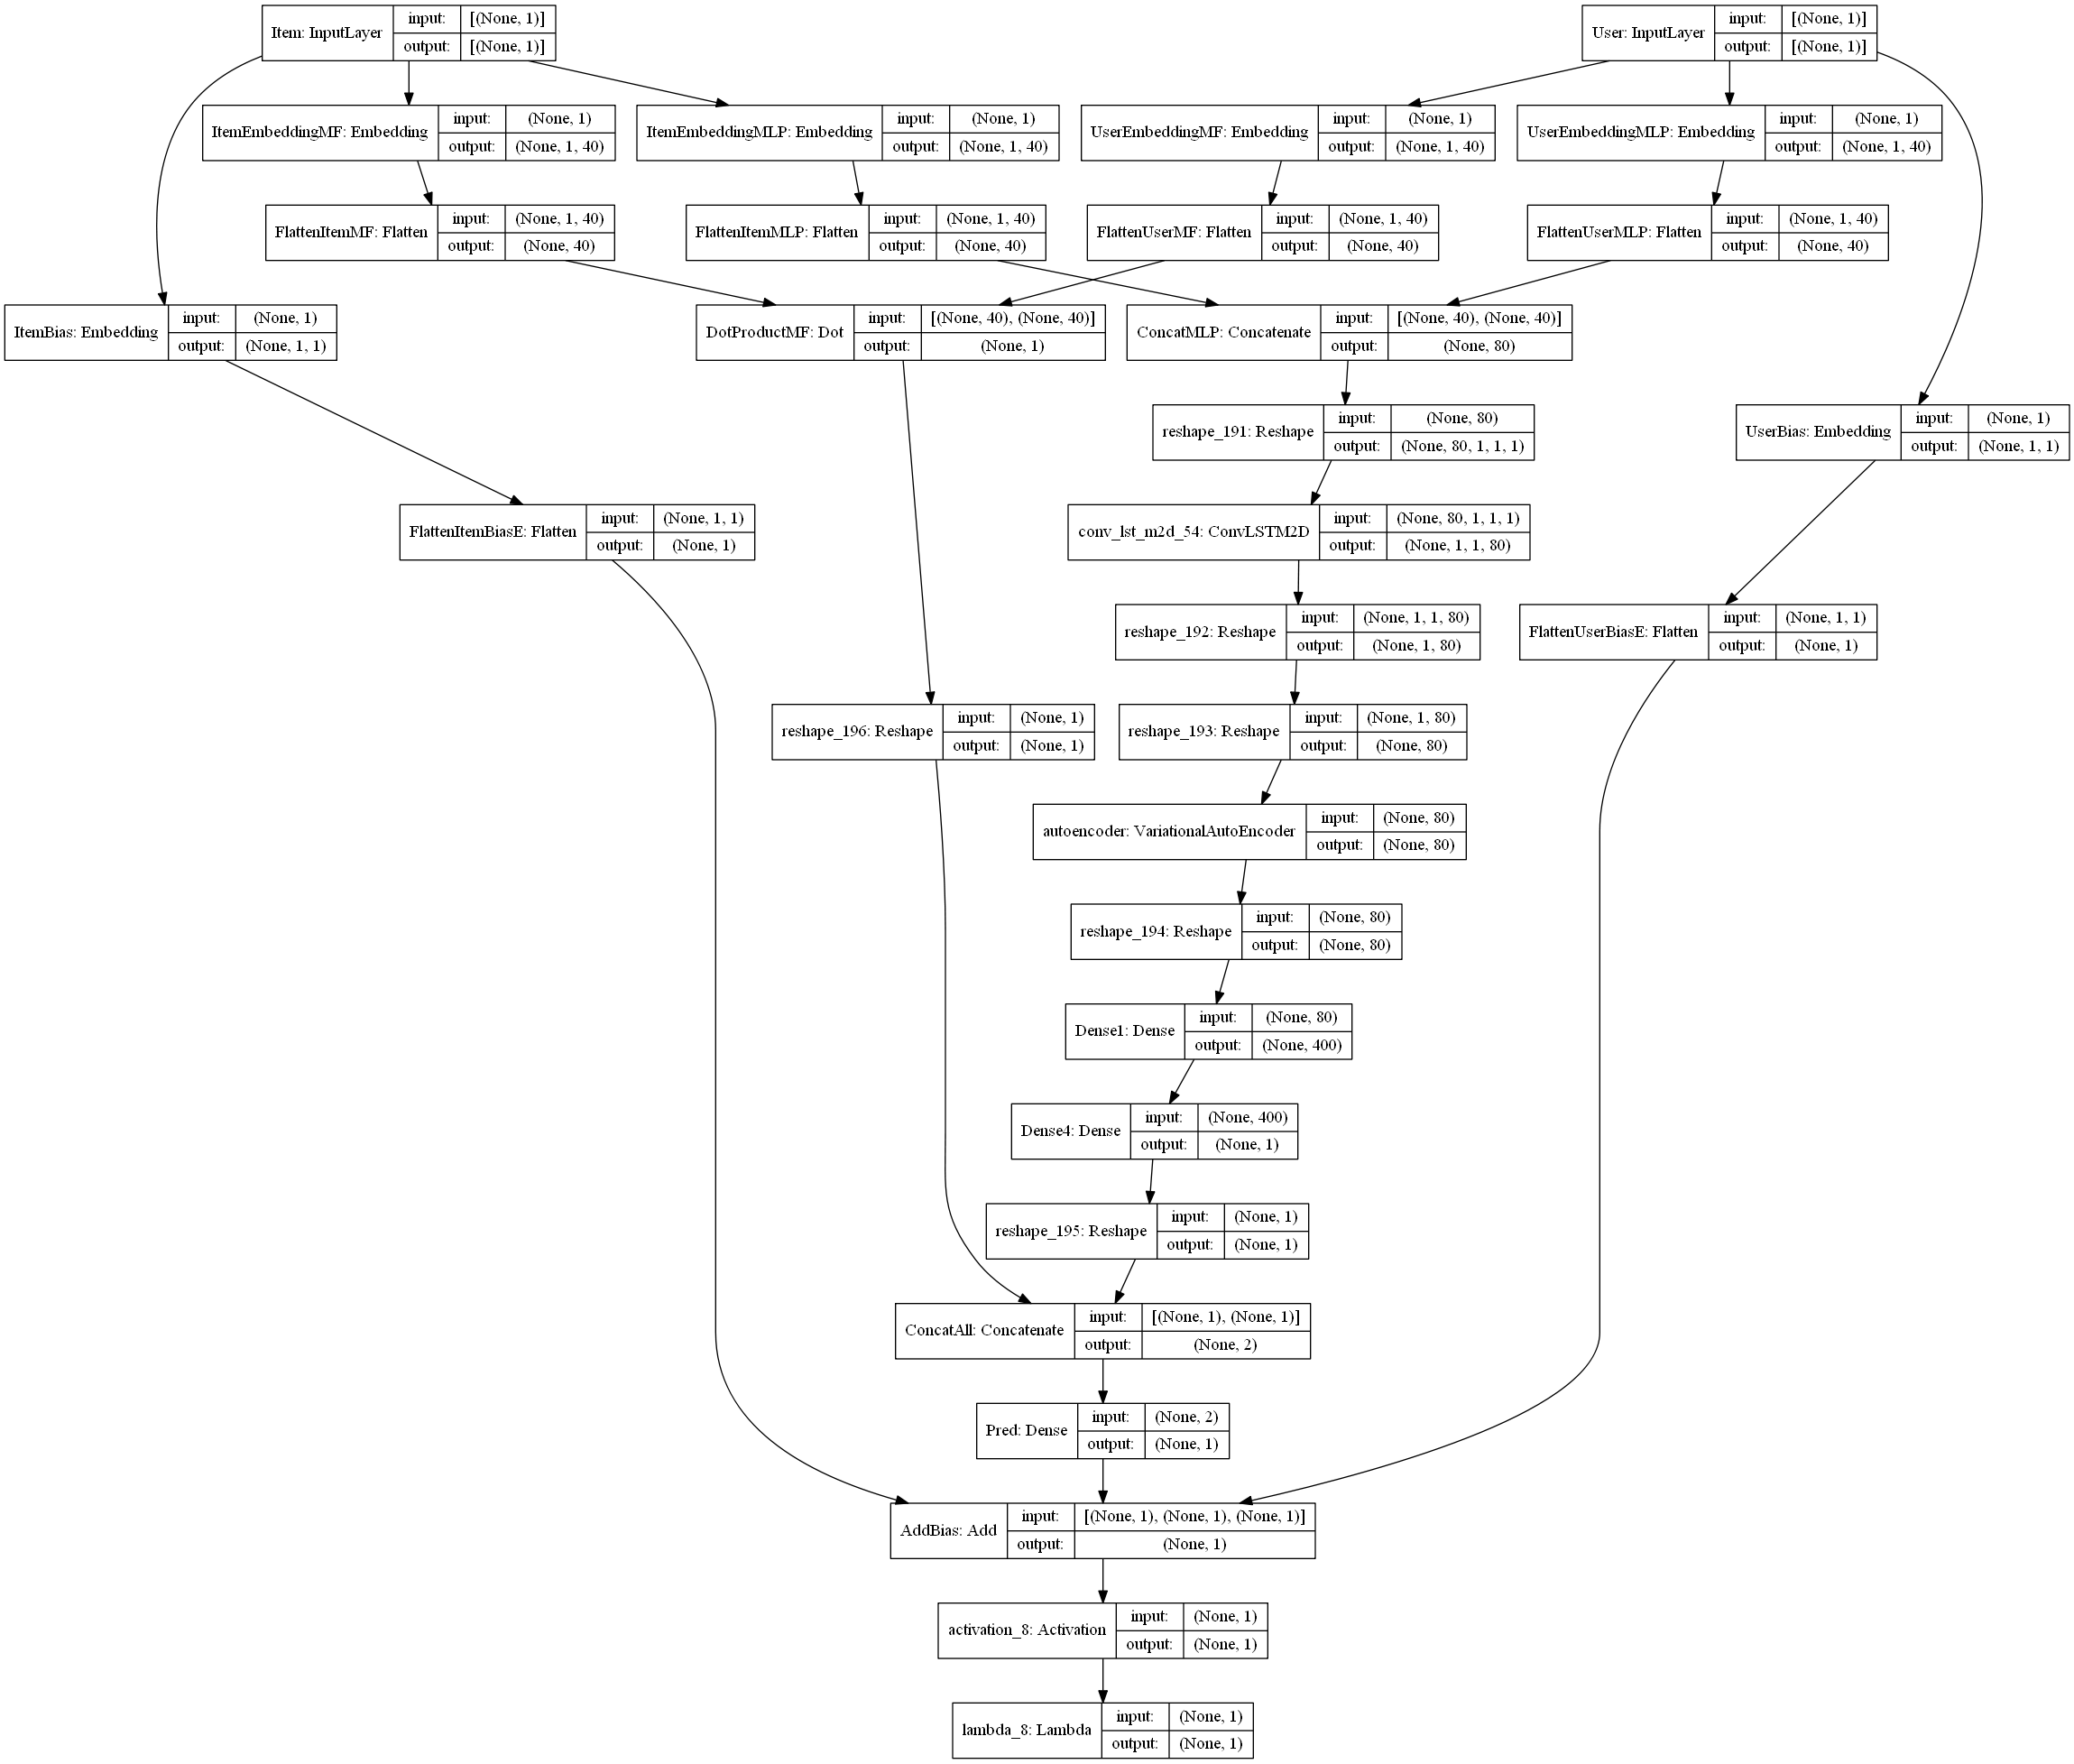

In [181]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [182]:

%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=64, epochs=8, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))

Epoch 1/8
14065/14065 [==============================] - 1226s 87ms/step - loss: 5162966016.0000 - val_loss: 342097088.0000
Epoch 2/8
14065/14065 [==============================] - 1071s 76ms/step - loss: 1240970240.0000 - val_loss: 448824192.0000
Epoch 3/8
14065/14065 [==============================] - 1092s 78ms/step - loss: 1136528000.0000 - val_loss: 339138688.0000
Epoch 4/8
14065/14065 [==============================] - 1109s 79ms/step - loss: 1103195392.0000 - val_loss: 322207072.0000
Epoch 5/8
14065/14065 [==============================] - 1102s 78ms/step - loss: 1095184896.0000 - val_loss: 311751392.0000
Epoch 6/8
14065/14065 [==============================] - 1105s 79ms/step - loss: 1071125248.0000 - val_loss: 357601408.0000
Epoch 7/8
14065/14065 [==============================] - 1106s 79ms/step - loss: 1074872448.0000 - val_loss: 373102496.0000
Epoch 8/8
14065/14065 [==============================] - 1117s 79ms/step - loss: 1051731776.0000 - val_loss: 365493984.0000
Wall tim

In [183]:
vis.metrics(output.history)

alt.FacetChart(...)

In [ ]:
def Neural_CF(n_users, n_items, n_factors):
    n_outputs = 1
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 10
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80,1, 1,1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 80, 1))(ConcatMLP1)
  
    
    FL = Flatten()(extract1)
    
    RV = RepeatVector(n_outputs)(FL)
    
    LM = LSTM(200, activation='relu', return_sequences=True)(RV)
    
    TD = TimeDistributed(Dense(100, activation='relu'))(LM)
                         
    TDD = TimeDistributed(Dense(1))(TD)
                                                                                                                                                         
    DotProductMF1 = layers.Reshape((1,1))(DotProductMF)
    
    
    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF1, TDD])
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [31]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
 
#X = 
#y = 
 
# Set up parameters
time_steps = 80
hidden_units = 2
epochs = 30
 
# RNN сеть
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mse', optimizer='adam')
    return model
 
model_RNN = create_RNN(hidden_units=hidden_units, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
 

 
 
# оценка не нужна
#train_mse = model_RNN.evaluate(trainX, trainY)
#test_mse = model_RNN.evaluate(testX, testY)
 
# ошибка
#print("Train set MSE = ", train_mse)
#print("Test set MSE = ", test_mse)
 
 
 # Attention класс для паоследующей интиеграйии в модель далее 
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)     
        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # выравнивание  - функция tahn
        e = K.tanh(K.dot(x,self.W)+self.b)
        # измерение убрать of size 1
        e = K.squeeze(e, axis=-1)#+(K.dot)*(K.dot)   
        # подсчёт весов
        alpha = K.softmax(e)
        # Приведение к формату tensorflow
        alpha = K.expand_dims(alpha, axis=-1)
        # вектор данных
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    
def create_RNN_with_attention(hidden_units, dense_units, input_shape, activation):
    x=Input(shape=input_shape)
    RNN_layer = SimpleRNN(hidden_units, return_sequences=True, activation=activation)(x)
    attention_layer = attention()(RNN_layer)
    outputs=Dense(dense_units, trainable=True, activation=activation)(attention_layer)
    model=Model(x,outputs)
    model.compile(loss='mse', optimizer='adam')    
    return model    
 
# создение модели
model_attention = create_RNN_with_attention(hidden_units=hidden_units, dense_units=1, 
                                  input_shape=(time_steps,1), activation='tanh')
model_attention.summary()    
 
 
 #model_attention.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 1)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 80, 2)             8         
                                                                 
 attention (attention)       (None, 2)                 82        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [150]:
n_items

1195

In [84]:
# Ядро с высзовом Attention слоя

def Neural_CF(n_users, n_items, n_factors):
    
    # Роботы ID
    item_input = Input(shape=[1], name='Item')
    
    # Роботы ID - embedings
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf) # 1 мерный
    
    
    # Роботы ID MLP
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

    # Пользователи или Login
    user_input = Input(shape=[1], name='User')
    
    # Пользователи факторизация Embedding MF
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    # Пользователи Embedding MF
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Скаларное умножение путей факторизации для построения  MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
    # Интеграция MLP путей - для предваритьельного вывода
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    # Вызов слоя attention !!!!!!!!!!!!!!!!!!
    MD = model_attention(ConcatMLP)
    Dense_1 = Dense(400, name="Dense1")(MD)
    Dense_2 = Dense(200, name="Dense2")(Dense_1)
    Dense_3 = Dense(100, name="Dense3")(Dense_2)
    
    Dense_4 = Dense(20, name="Dense4")(Dense_3)

    # Финальная интеграция MF MLP 
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_4])
    
    # Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    #  Ролболты - Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # Пользовательский  Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Предскзание с калибровкой
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Модель
    model = Model([user_input, item_input], rating_output)
    
    # Компиляция
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [85]:
n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)


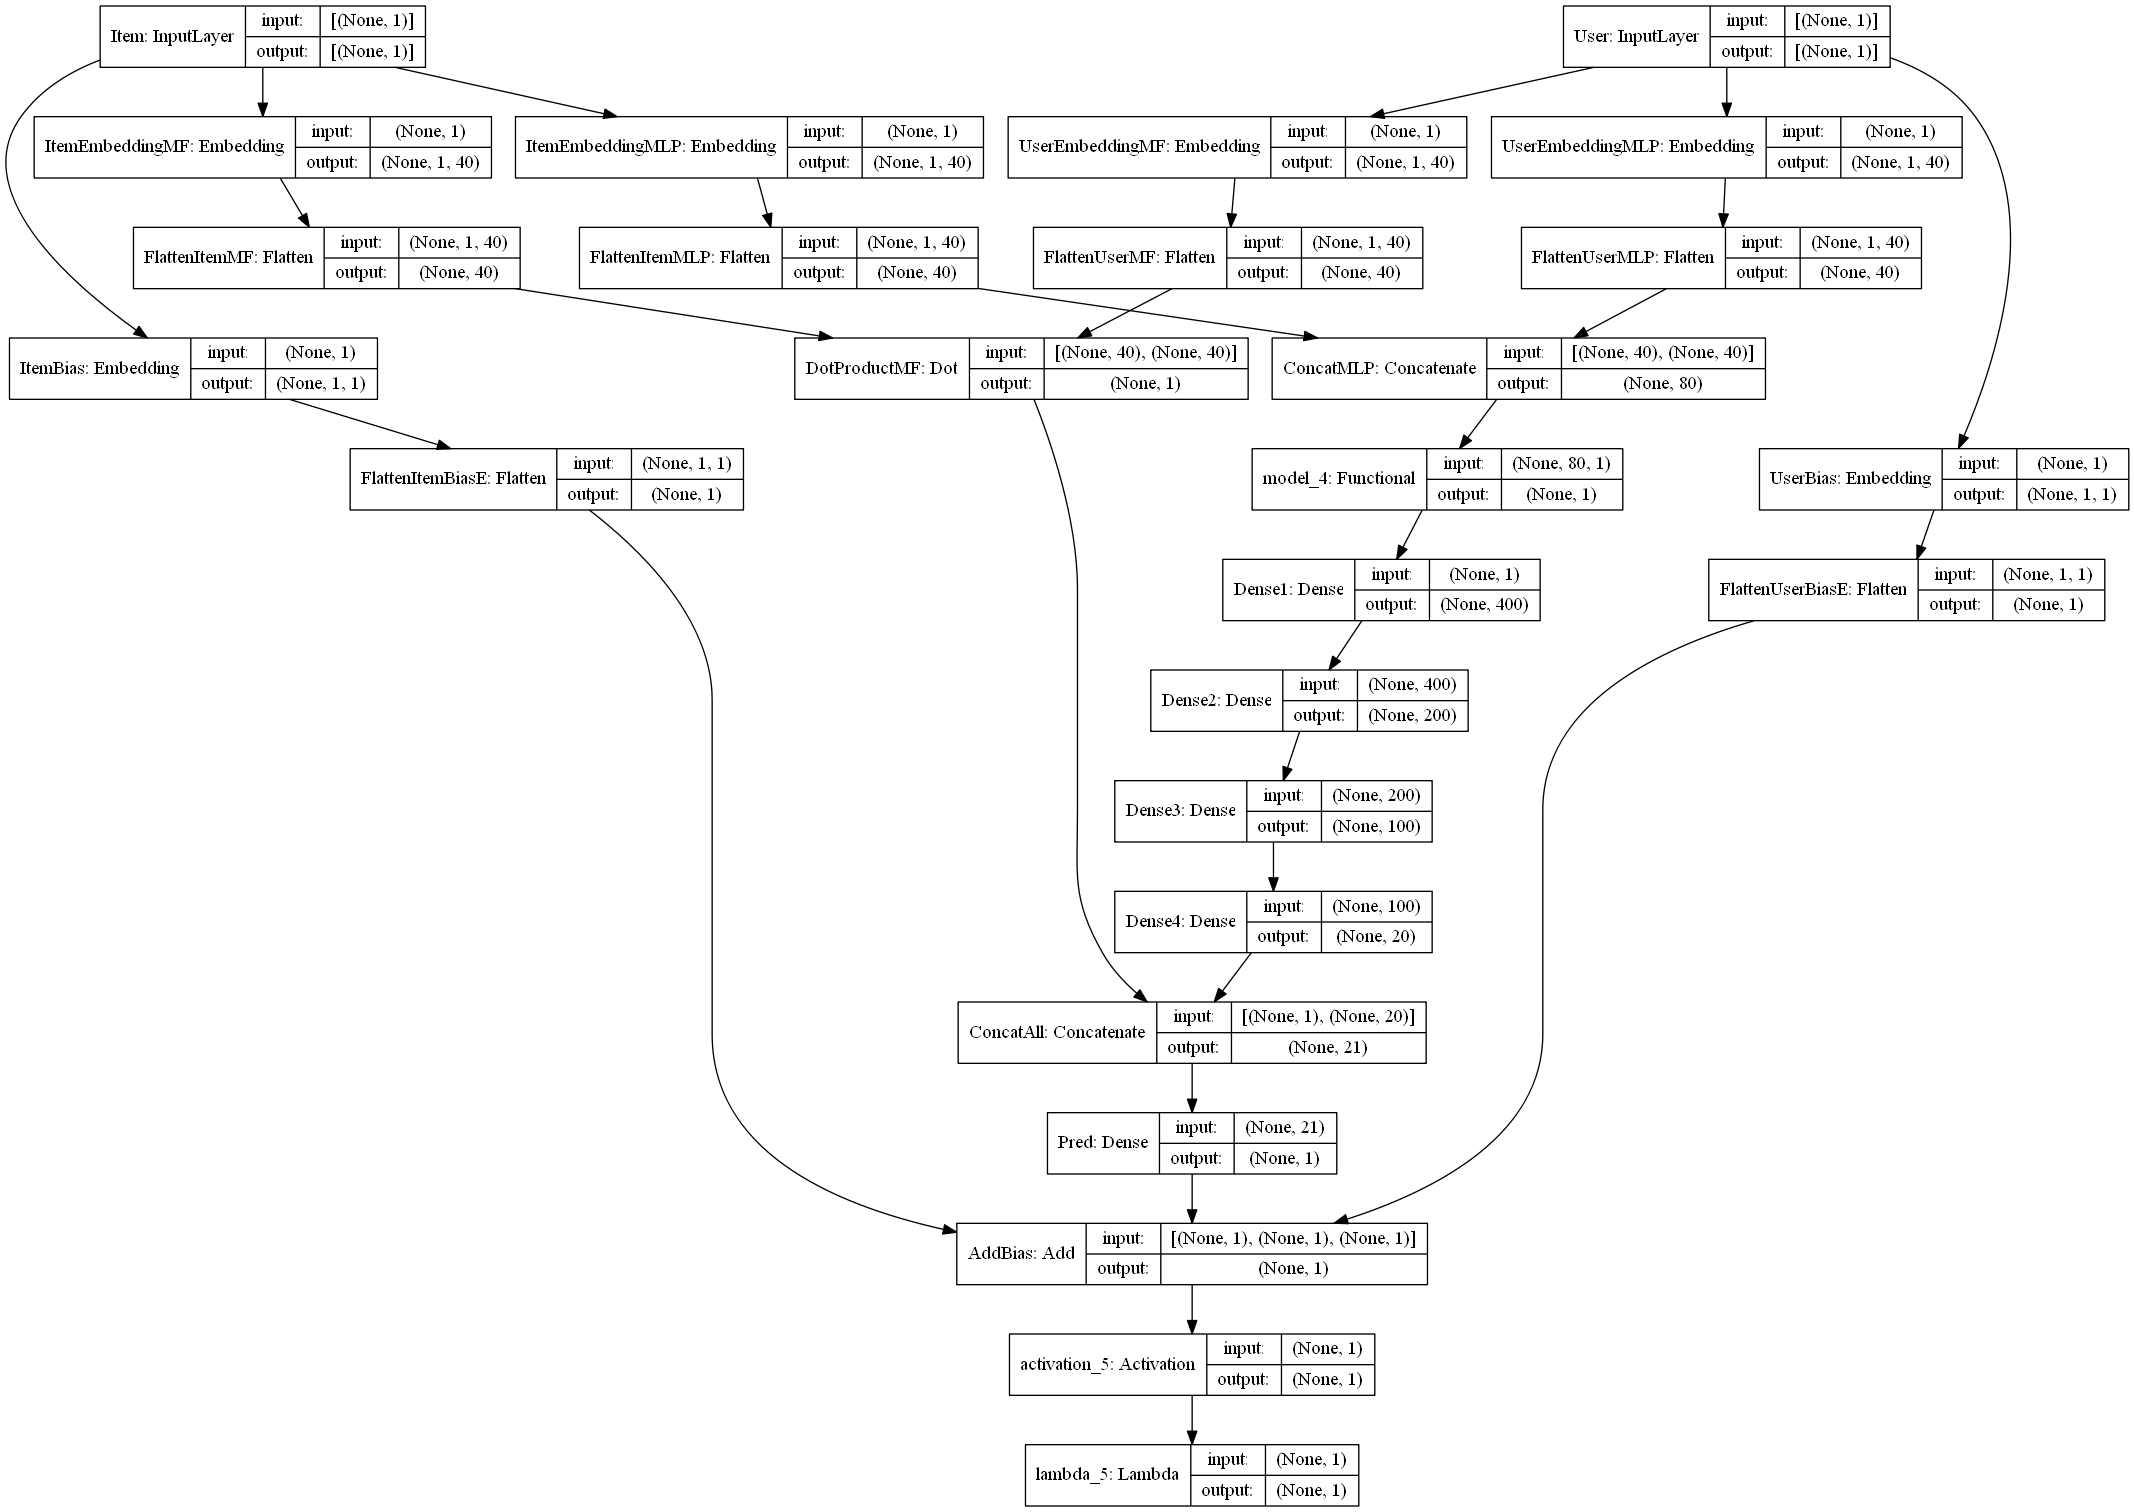

In [86]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [87]:

%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=4, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))

Epoch 1/4
7033/7033 [==============================] - 109s 15ms/step - loss: 3451141376.0000 - val_loss: 807303616.0000
Epoch 2/4
7033/7033 [==============================] - 114s 16ms/step - loss: 1089054336.0000 - val_loss: 309994496.0000
Epoch 3/4
7033/7033 [==============================] - 105s 15ms/step - loss: 1038743872.0000 - val_loss: 381468704.0000
Epoch 4/4
7033/7033 [==============================] - 114s 16ms/step - loss: 1047276480.0000 - val_loss: 340899072.0000
Wall time: 7min 21s


In [33]:
vis.metrics(output.history)

alt.FacetChart(...)

In [43]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k

In [44]:
item_embedding_mf = get_embedding(model, "ItemEmbeddingMF")
user_embedding_mf = get_embedding(model, "UserEmbeddingMF")
item_embedding_mlp = get_embedding(model, "ItemEmbeddingMLP")
user_embedding_mlp = get_embedding(model, "UserEmbeddingMLP")

In [45]:


item_embedding = np.mean([item_embedding_mf,item_embedding_mlp], axis=0)
user_embedding = np.mean([user_embedding_mf,user_embedding_mlp], axis=0)

In [46]:
%%time
predictions = get_predictions(model, DATA)

Wall time: 7min 36s


,USER,ITEM,RATING_PRED
0,2,0,69238.5
1,2,237,66929.5
2,2,205,68828.5
3,2,427,70815.0
4,2,4,65330.5


In [173]:
%%time
# Recommendation for Top10K
ranking_topk = recommend_topk(model, DATA, train, k=5)

Wall time: 10min 33s


In [174]:
eval_precision = precision_at_k(test, ranking_topk, k=10)
eval_recall = recall_at_k(test, ranking_topk, k=10)
eval_ndcg = ndcg_at_k(test, ranking_topk, k=10)

print("NDCG@K:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

NDCG@K:	0.000000
Precision@K:	0.000000
Recall@K:	0.000000


In [128]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
 
#X = 
#y = 
 
# Set up parameters
time_steps = 80
hidden_units = 2
epochs = 30
 
# RNN сеть
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mse', optimizer='adam')
    return model
 
model_RNN = create_RNN(hidden_units=hidden_units, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
 

 
 
# оценка не нужна
#train_mse = model_RNN.evaluate(trainX, trainY)
#test_mse = model_RNN.evaluate(testX, testY)
 
# ошибка
#print("Train set MSE = ", train_mse)
#print("Test set MSE = ", test_mse)
 
 
 # Attention класс для паоследующей интиеграйии в модель далее 
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        #self.c=self.add_weight(name='attention_weight',shape=(input_shape[-1],1)),
         #                      initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)   
        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # выравнивание  - функция tahn
        e = K.relu(K.dot(x,self.W)+self.b)#*self.c)# + Factorization 
        # измерение убрать of size 1
        e = K.squeeze(e, axis=-1)#+(K.dot)*(K.dot)   
        # подсчёт весов
        alpha = K.softmax(e)
        # Приведение к формату tensorflow
        alpha = K.expand_dims(alpha, axis=-1)
        # вектор данных
        context = x * alpha * alpha
        context = K.sum(context, axis=1)
        return context
    
def create_RNN_with_attention(hidden_units, dense_units, input_shape, activation):
    x=Input(shape=input_shape)
    RNN_layer = SimpleRNN(hidden_units, return_sequences=True, activation=activation)(x)
    attention_layer = attention()(RNN_layer)
    outputs=Dense(dense_units, trainable=True, activation=activation)(attention_layer)
    model=Model(x,outputs)
    model.compile(loss='mse', optimizer='adam')    
    return model    
 
# создение модели
model_attention = create_RNN_with_attention(hidden_units=hidden_units, dense_units=1, 
                                  input_shape=(time_steps,1), activation='tanh')
model_attention.summary()    
 
 
 #model_attention.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 1)]           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 80, 2)             8         
_________________________________________________________________
attention_1 (attention)      (None, 2)                 82        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 3         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [1]:
from pandas import read_csv
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
 
#X = 
#y = 
 
# Set up parameters
time_steps = 80
hidden_units = 2
epochs = 30
 
# RNN сеть
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mse', optimizer='adam')
    return model
 
model_RNN = create_RNN(hidden_units=hidden_units, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
 

 
 
# оценка не нужна
#train_mse = model_RNN.evaluate(trainX, trainY)
#test_mse = model_RNN.evaluate(testX, testY)
 
# ошибка
#print("Train set MSE = ", train_mse)
#print("Test set MSE = ", test_mse)
 
 
 # Attention класс для паоследующей интиеграйии в модель далее 
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        #self.c=self.add_weight(name='attention_weight',shape=(input_shape[-1],1)),
         #                      initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)   
       
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # выравнивание  - функция tahn
        e = K.relu(K.dot(x,self.W)+self.b)#*self.c)# + Factorization 
        # измерение убрать of size 1
        e = K.squeeze(e, axis=-1)#+(K.dot)*(K.dot)   
        # подсчёт весов
        alpha = K.softmax(e)
        # Приведение к формату tensorflow
        alpha = K.expand_dims(alpha, axis=-1)
        # вектор данных
        context = x * alpha * alpha
        context = K.sum(context, axis=1)
        return context
    
def create_RNN_with_attention(hidden_units, dense_units, input_shape, activation):
    x=Input(shape=input_shape)
    RNN_layer = SimpleRNN(hidden_units, return_sequences=True, activation=activation)(x)
    attention_layer = attention()(RNN_layer)
    outputs=Dense(dense_units, trainable=True, activation=activation)(attention_layer)
    model=Model(x,outputs)
    model.compile(loss='mse', optimizer='adam')    
    return model    
 
# создение модели
model_attention = create_RNN_with_attention(hidden_units=hidden_units, dense_units=1, 
                                  input_shape=(time_steps,1), activation='tanh')
model_attention.summary()    
 
 
 #model_attention.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 1)]           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 80, 2)             8         
_________________________________________________________________
attention (attention)        (None, 2)                 82        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [59]:
import tensorflow as tf
from tensorflow import keras


In [86]:
class MinimalRNNCell(tf.keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]
  

In [25]:
import tensorflow as tf
from tensorflow import keras


In [32]:
from tensorflow.keras import layers


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class Encoder(layers.Layer):
    """Maps MNIST digits to a triplet (z_mean, z_log_var, z)."""

    def __init__(self, latent_dim=32, intermediate_dim=64, name="encoder", **kwargs):
        super(Encoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, inputs):
        x = self.dense_proj(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z


class Decoder(layers.Layer):
    """Converts z, the encoded digit vector, back into a readable digit."""

    def __init__(self, original_dim, intermediate_dim=64, name="decoder", **kwargs):
        super(Decoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_output = layers.Dense(original_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.dense_proj(inputs)
        return self.dense_output(x)


class VariationalAutoEncoder(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        original_dim,
        intermediate_dim=64,
        latent_dim=32,
        name="autoencoder",
        **kwargs
    ):
        super(VariationalAutoEncoder, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim=latent_dim, intermediate_dim=intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim=intermediate_dim)

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        # Add KL divergence regularization loss.
        kl_loss = -0.5 * tf.reduce_mean(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
        )
        self.add_loss(kl_loss)
        return reconstructed



In [26]:
from tensorflow.keras import layers


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class Encoder(layers.Layer):
    """Maps MNIST digits to a triplet (z_mean, z_log_var, z)."""

    def __init__(self, latent_dim=32, intermediate_dim=64, name="encoder", **kwargs):
        super(Encoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, inputs):
        x = self.dense_proj(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z


class Decoder(layers.Layer):
    """Converts z, the encoded digit vector, back into a readable digit."""

    def __init__(self, original_dim, intermediate_dim=64, name="decoder", **kwargs):
        super(Decoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_output = layers.Dense(original_dim, activation="sigmoid")

    def call(self, inputs):
        x = self.dense_proj(inputs)
        return self.dense_output(x)


class VariationalAutoEncoder(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        original_dim,
        intermediate_dim=16,
        latent_dim=8,
        name="autoencoder",
        **kwargs
    ):
        super(VariationalAutoEncoder, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim=latent_dim, intermediate_dim=intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim=intermediate_dim)

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        # Add KL divergence regularization loss.
        kl_loss = -0.1 * tf.reduce_mean(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
        )
        self.add_loss(kl_loss)
        return reconstructed



In [27]:
vae = VariationalAutoEncoder(80,1)
#vae = VariationalAutoEncoder(784, 64, 32)

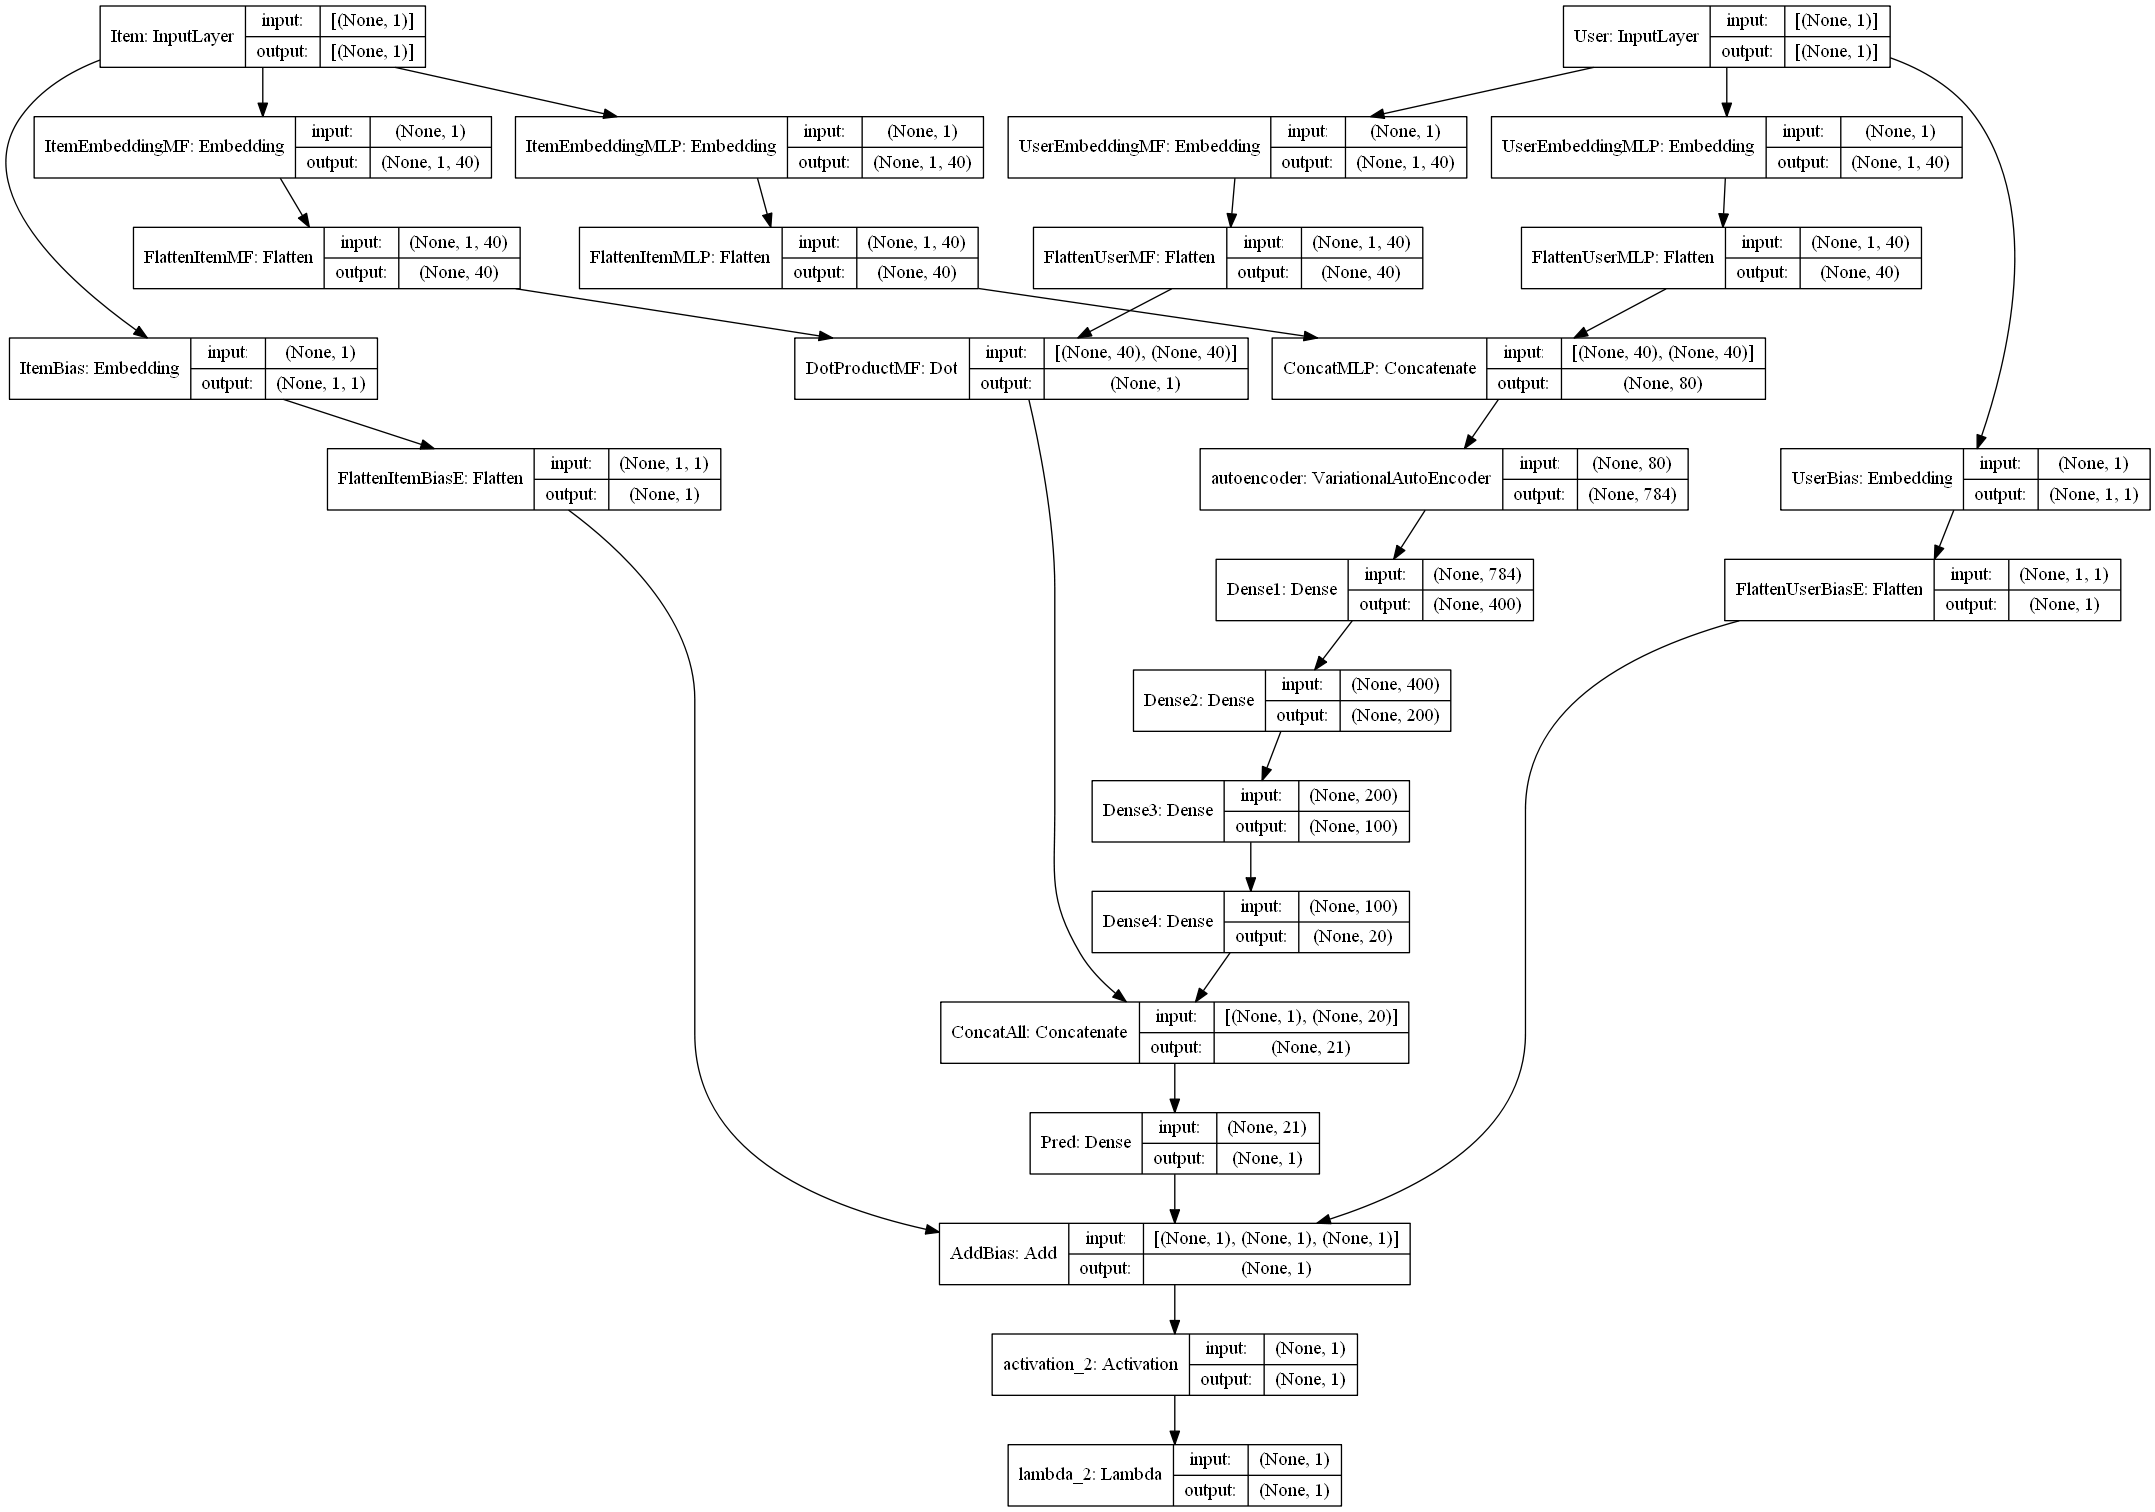

In [143]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [ ]:
##Вариационный и Attention интегрированы

In [208]:
# Ядро с высзовом Attention слоя

def Neural_CF(n_users, n_items, n_factors):
    
    # Роботы ID
    item_input = Input(shape=[1], name='Item')
    
    # Роботы ID - embedings
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf) # 1 мерный
    
    
    # Роботы ID MLP
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

    # Пользователи или Login
    user_input = Input(shape=[1], name='User')
    
    # Пользователи факторизация Embedding MF
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    # Пользователи Embedding MF
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Скаларное умножение путей факторизации для построения  MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
    # Интеграция MLP путей - для предваритьельного вывода
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    # Вызов слоя attention !!!!!!!!!!!!!!!!!!
    #TF = tf.strings.as_string(ConcatMLP)

    MD = vae(ConcatMLP)
    MA = model_attention(MD)
   

    # Финальная интеграция MF MLP 
    Concat = Concatenate(name="ConcatAll")([DotProductMF, MA])
    
    # Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    #  Ролболты - Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # Пользовательский  Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Предскзание с калибровкой
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Модель
    model = Model([user_input, item_input], rating_output)
    
    #tf.keras.optimizers.Adam(learning_rate=0.002,beta_1=0.1,beta_2=0.001,epsilon=1e-02,amsgrad=True,name="Adam")

    
    # Компиляция
    model.compile(loss='mean_squared_error', optimizer="adagrad")
    
    return model

In [203]:
# Ядро с высзовом Attention слоя

def Neural_CF(n_users, n_items, n_factors):
    
    # Роботы ID
    item_input = Input(shape=[1], name='Item')
    
    # Роботы ID - embedings
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf) # 1 мерный
    
    
    # Роботы ID MLP
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

    # Пользователи или Login
    user_input = Input(shape=[1], name='User')
    
    # Пользователи факторизация Embedding MF
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    # Пользователи Embedding MF
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Скаларное умножение путей факторизации для построения  MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
    # Интеграция MLP путей - для предваритьельного вывода
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    # Вызов слоя attention !!!!!!!!!!!!!!!!!!
    #TF = tf.strings.as_string(ConcatMLP)

    MD = vae(ConcatMLP)
    MA = model_attention(MD)
    Dense_1 = Dense(400, name="Dense1")(MA)
    Dense_2 = Dense(200, name="Dense2")(Dense_1)
    Dense_3 = Dense(100, name="Dense3")(Dense_2)
    Dense_4 = Dense(20, name="Dense4")(Dense_3)

    # Финальная интеграция MF MLP 
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_4])
    
    # Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    #  Ролболты - Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # Пользовательский  Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Предскзание с калибровкой
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Модель
    model = Model([user_input, item_input], rating_output)
    
    # Компиляция
    model.compile(loss='mean_squared_error', optimizer="adagrad")
    
    return model

In [209]:
n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)

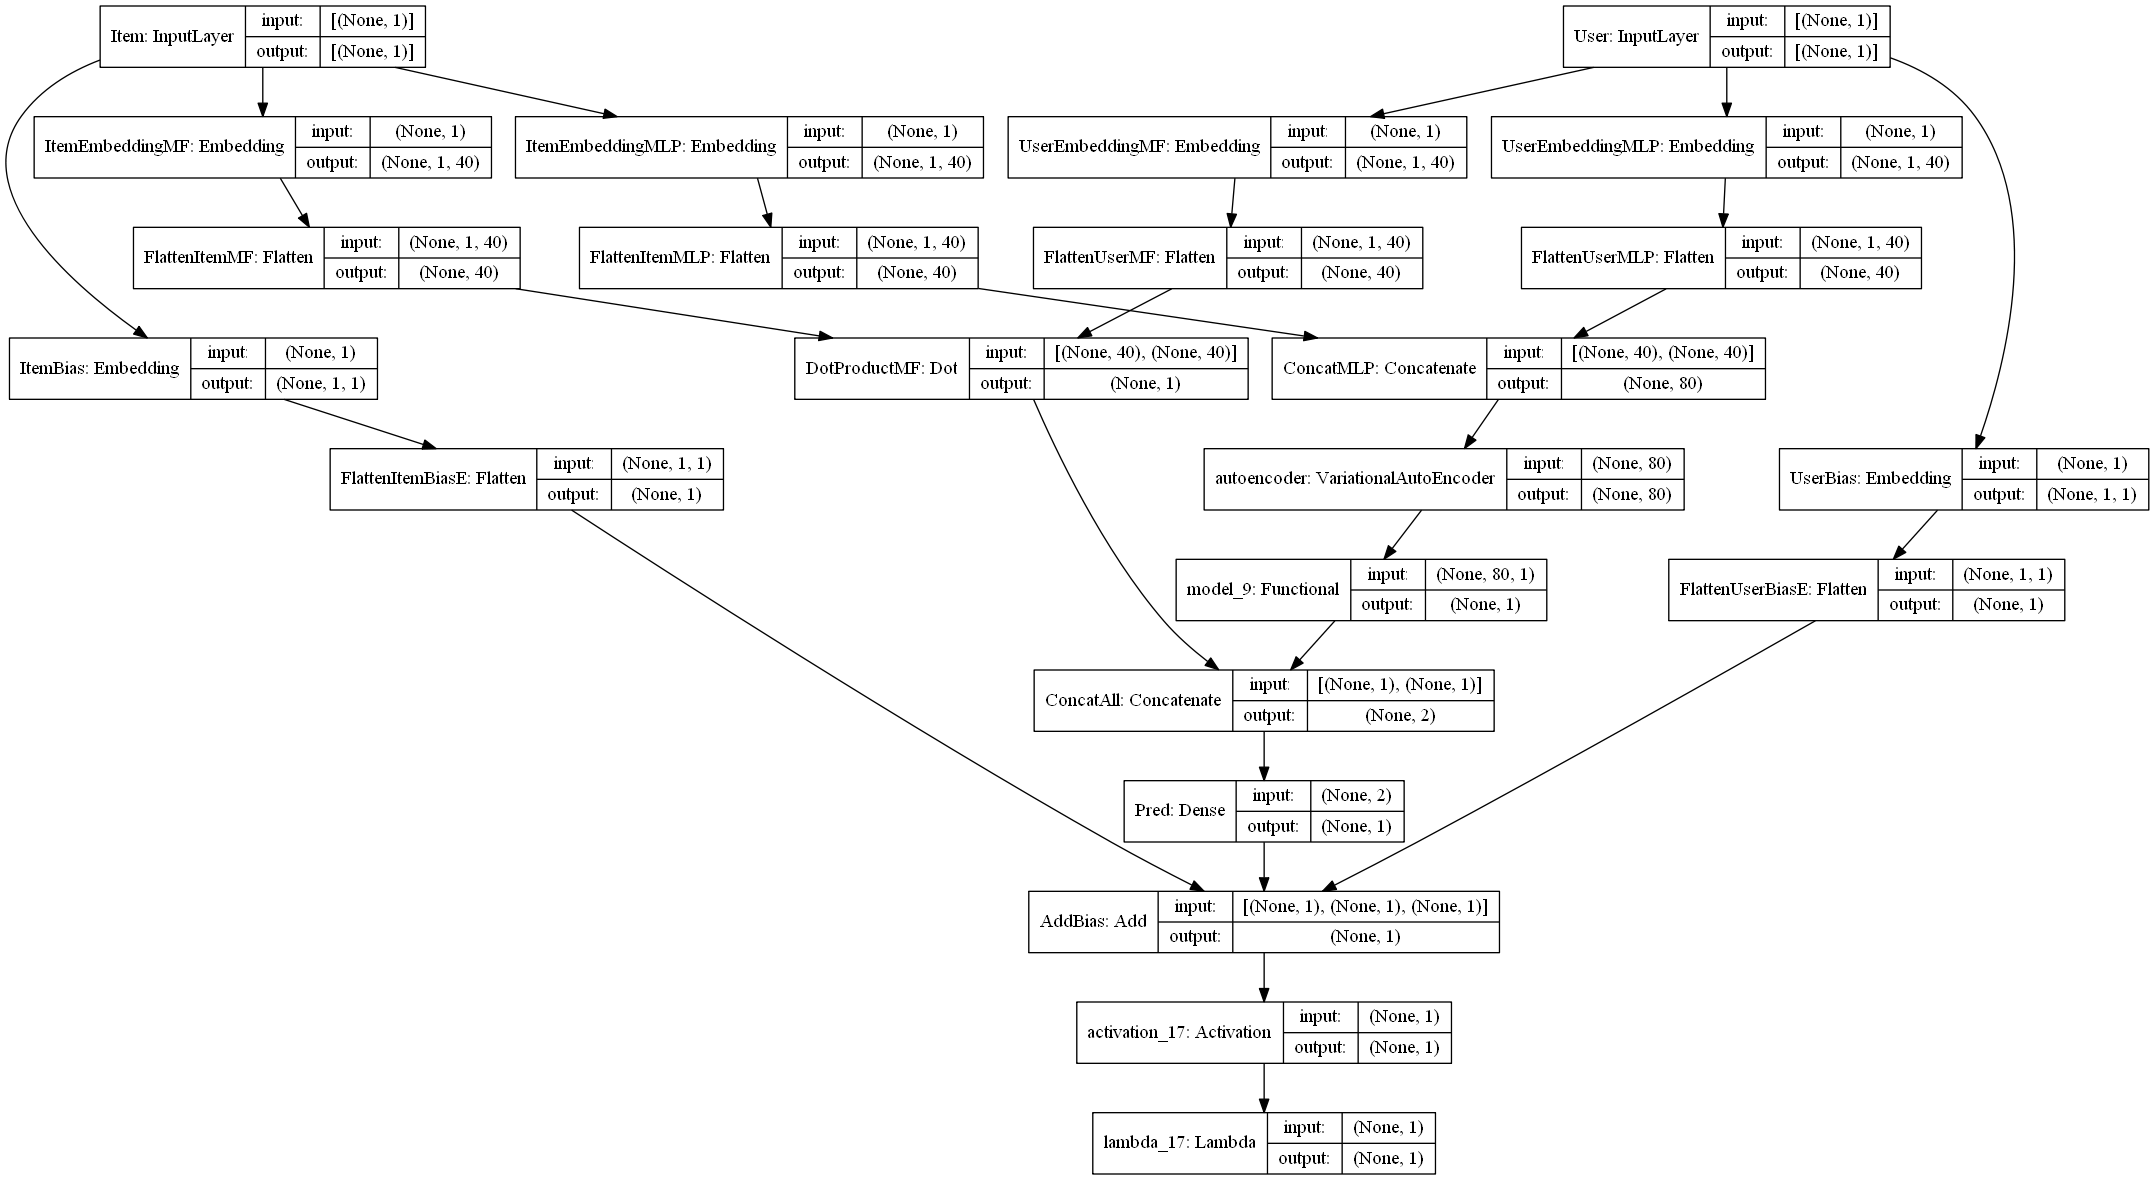

In [210]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

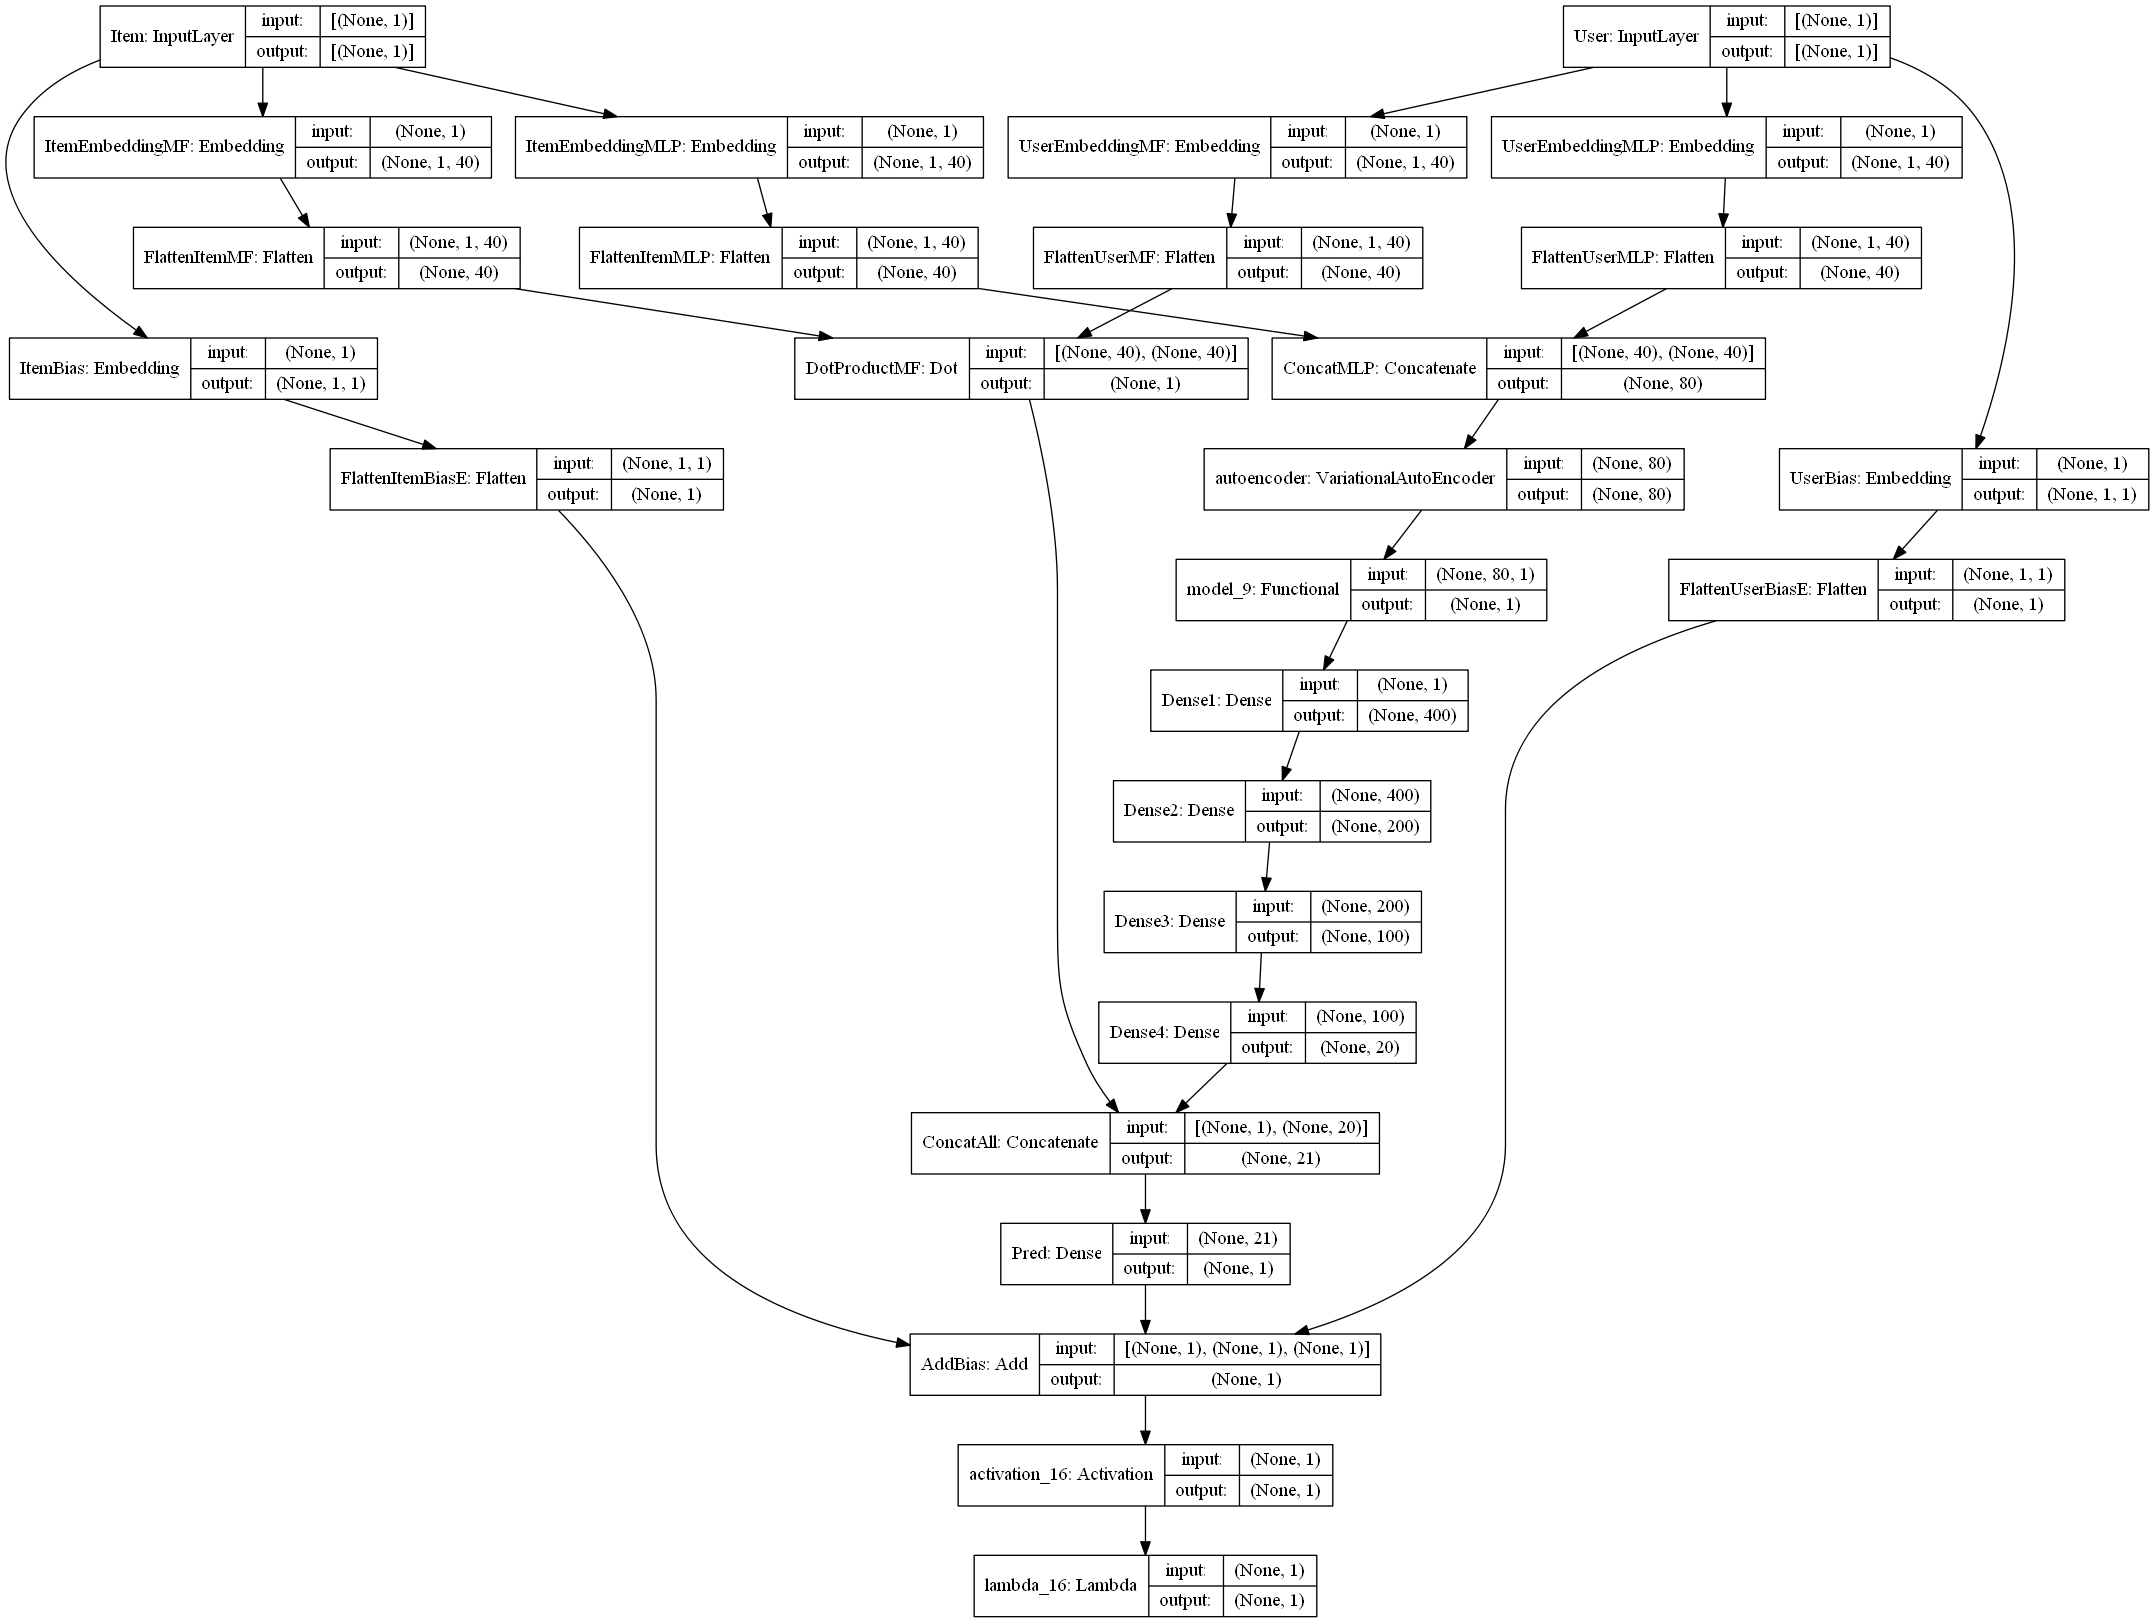

In [205]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [211]:
%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=8, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))

Epoch 1/8
7033/7033 [==============================] - 112s 16ms/step - loss: 389844041728.0000 - val_loss: 107880407040.0000
Epoch 2/8
7033/7033 [==============================] - 109s 16ms/step - loss: 73340854272.0000 - val_loss: 51336507392.0000
Epoch 3/8
7033/7033 [==============================] - 111s 16ms/step - loss: 38953824256.0000 - val_loss: 30439696384.0000
Epoch 4/8
7033/7033 [==============================] - 116s 16ms/step - loss: 24671541248.0000 - val_loss: 20543981568.0000
Epoch 5/8
7033/7033 [==============================] - 114s 16ms/step - loss: 17419589632.0000 - val_loss: 15073422336.0000
Epoch 6/8
7033/7033 [==============================] - 115s 16ms/step - loss: 13227207680.0000 - val_loss: 11708792832.0000
Epoch 7/8
7033/7033 [==============================] - 115s 16ms/step - loss: 10568409088.0000 - val_loss: 9469594624.0000
Epoch 8/8
7033/7033 [==============================] - 115s 16ms/step - loss: 8760245248.0000 - val_loss: 7889181184.0000
Wall time

In [212]:
vis.metrics(output.history)

alt.FacetChart(...)

In [215]:
import sys
sys.path.append('C:/Users/zabolotskiy/PSOkeras')

In [216]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from psokeras import Optimizer

N = 30 # number of particles
STEPS = 300 # number of steps
LOSS = 'mse' # Loss function
BATCH_SIZE = 32 # Size of batches to train on


In [221]:
model = Neural_CF(n_users, n_items, n_factors)

In [ ]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k
item_embedding_mf = get_embedding(model, "ItemEmbeddingMF")
user_embedding_mf = get_embedding(model, "UserEmbeddingMF")
item_embedding_mlp = get_embedding(model, "ItemEmbeddingMLP")
user_embedding_mlp = get_embedding(model, "UserEmbeddingMLP")

item_embedding = np.mean([item_embedding_mf,item_embedding_mlp], axis=0)
user_embedding = np.mean([user_embedding_mf,user_embedding_mlp], axis=0)

predictions = get_predictions(model, DATA)
predictions.head()

# Recommendation for Top10K
ranking_topk = recommend_topk(model, DATA, train, k=5)
eval_precision = precision_at_k(test, ranking_topk, k=10)
eval_recall = recall_at_k(test, ranking_topk, k=10)
eval_ndcg = ndcg_at_k(test, ranking_topk, k=10)

print("NDCG@K:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

In [177]:
# univariate multi-step encoder-decoder lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [238]:



def build_model():

	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model
 

In [379]:


def Neural_CF(n_users, n_items, n_factors):
    
    
    item_input = Input(shape=[1], name='Item')
    
    
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf)
    
    
   
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

   
    user_input = Input(shape=[1], name='User')
    
   
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Умножение MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    #ConcatMLP = Concat.reshape(1, 100, 1)
    # Интеграция MLP paths
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    
    # Dense корреляции
    #Concat=LSTM(100, input_shape = (1,1))(ConcatMLP)
    #TD = TimeDistributed(Dense(400)(Concat)
    #Dense_1 = Concat.reshape(1, 100, 1)
    #LSTM_x = LSTM(200)(ConcatMLP)
    
    #ConcatMLP = Input(shape=(100,1))
    #ConcatMLP = tf.reshape((1, ConcatMLP.shape[0], ConcatMLP.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    
    n_features = 1
    
    #reshaped = Reshape((12, 12, 2560))
    #ConcatMLP = ConcatMLP.reshape((ConcatMLP.shape[0], ConcatMLP.shape[1], n_features))
    ConcatMLP1 = layers.Reshape((80, 1))(ConcatMLP)
    #ConcatMLP = ConcatMLP.reshape(100, 100, 1).astype("float32") / 255
    #X = X.reshape((X.shape[0], X.shape[1], 1))
    #ConcatMLP = Reshape((100, 100, n_features))
   # параметры
    extract1 = LSTM(40, return_sequences=True)(ConcatMLP1)
    extract2 = LSTM(20, return_sequences=True)(extract1)
    
    extract3 = LSTM(10, return_sequences=True)(extract2)
    extract4 = LSTM(10, return_sequences=True)(extract3)
   # classification output
    class11 = LSTM(1)(extract4)
   
    class12 = layers.Reshape((1,1))(class11)
    
    
    TD = TimeDistributed(Dense(1, activation='relu'))(class12)
    
    TD2 = TimeDistributed(Dense(1))(TD)
    

  
    DotProductMF1 = layers.Reshape((1,1))(DotProductMF)
    
 
    # Интеграция MF and MLP paths
    Concat = Concatenate(name="ConcatAll")([DotProductMF1, TD2])
    
   # Concat2 = Dense_4 = Dense(20, name="Dense4")(Dense_3)
    
    # Опять в Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    # Item смещение
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # User смещение
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    #  Предсказание со смещением
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y1 = Activation('sigmoid')(PredAddBias)
    
    
    y = layers.Reshape((1,))(y1) #x = Reshape((4,), name="coords") уменьшение размерности
    
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Создание модели
    model = Model([user_input, item_input], rating_output)
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [156]:
# Ядро с высзовом Attention слоя

def Neural_CF(n_users, n_items, n_factors):
    
    # Роботы ID
    item_input = Input(shape=[1], name='Item')
    
    # Роботы ID - embedings
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf) # 1 мерный
    
    
    # Роботы ID MLP
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

    # Пользователи или Login
    user_input = Input(shape=[1], name='User')
    
    # Пользователи факторизация Embedding MF
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    # Пользователи Embedding MF
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Скаларное умножение путей факторизации для построения  MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
    # Интеграция MLP путей - для предваритьельного вывода
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    # Вызов слоя attention !!!!!!!!!!!!!!!!!!
    #TF = tf.strings.as_string(ConcatMLP)

   
    MA = model_attention(ConcatMLP)
    Dense_1 = Dense(400, name="Dense1")(MA)
    Dense_2 = Dense(200, name="Dense2")(Dense_1)
    Dense_3 = Dense(100, name="Dense3")(Dense_2)
    Dense_4 = Dense(20, name="Dense4")(Dense_3)

    # Финальная интеграция MF MLP 
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_4])
    
    # Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    #  Ролболты - Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # Пользовательский  Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Предскзание с калибровкой
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Модель
    model = Model([user_input, item_input], rating_output)
    
    # Компиляция
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [157]:
n_factors = 40
model = Neural_CF(n_users, n_items, n_factors)

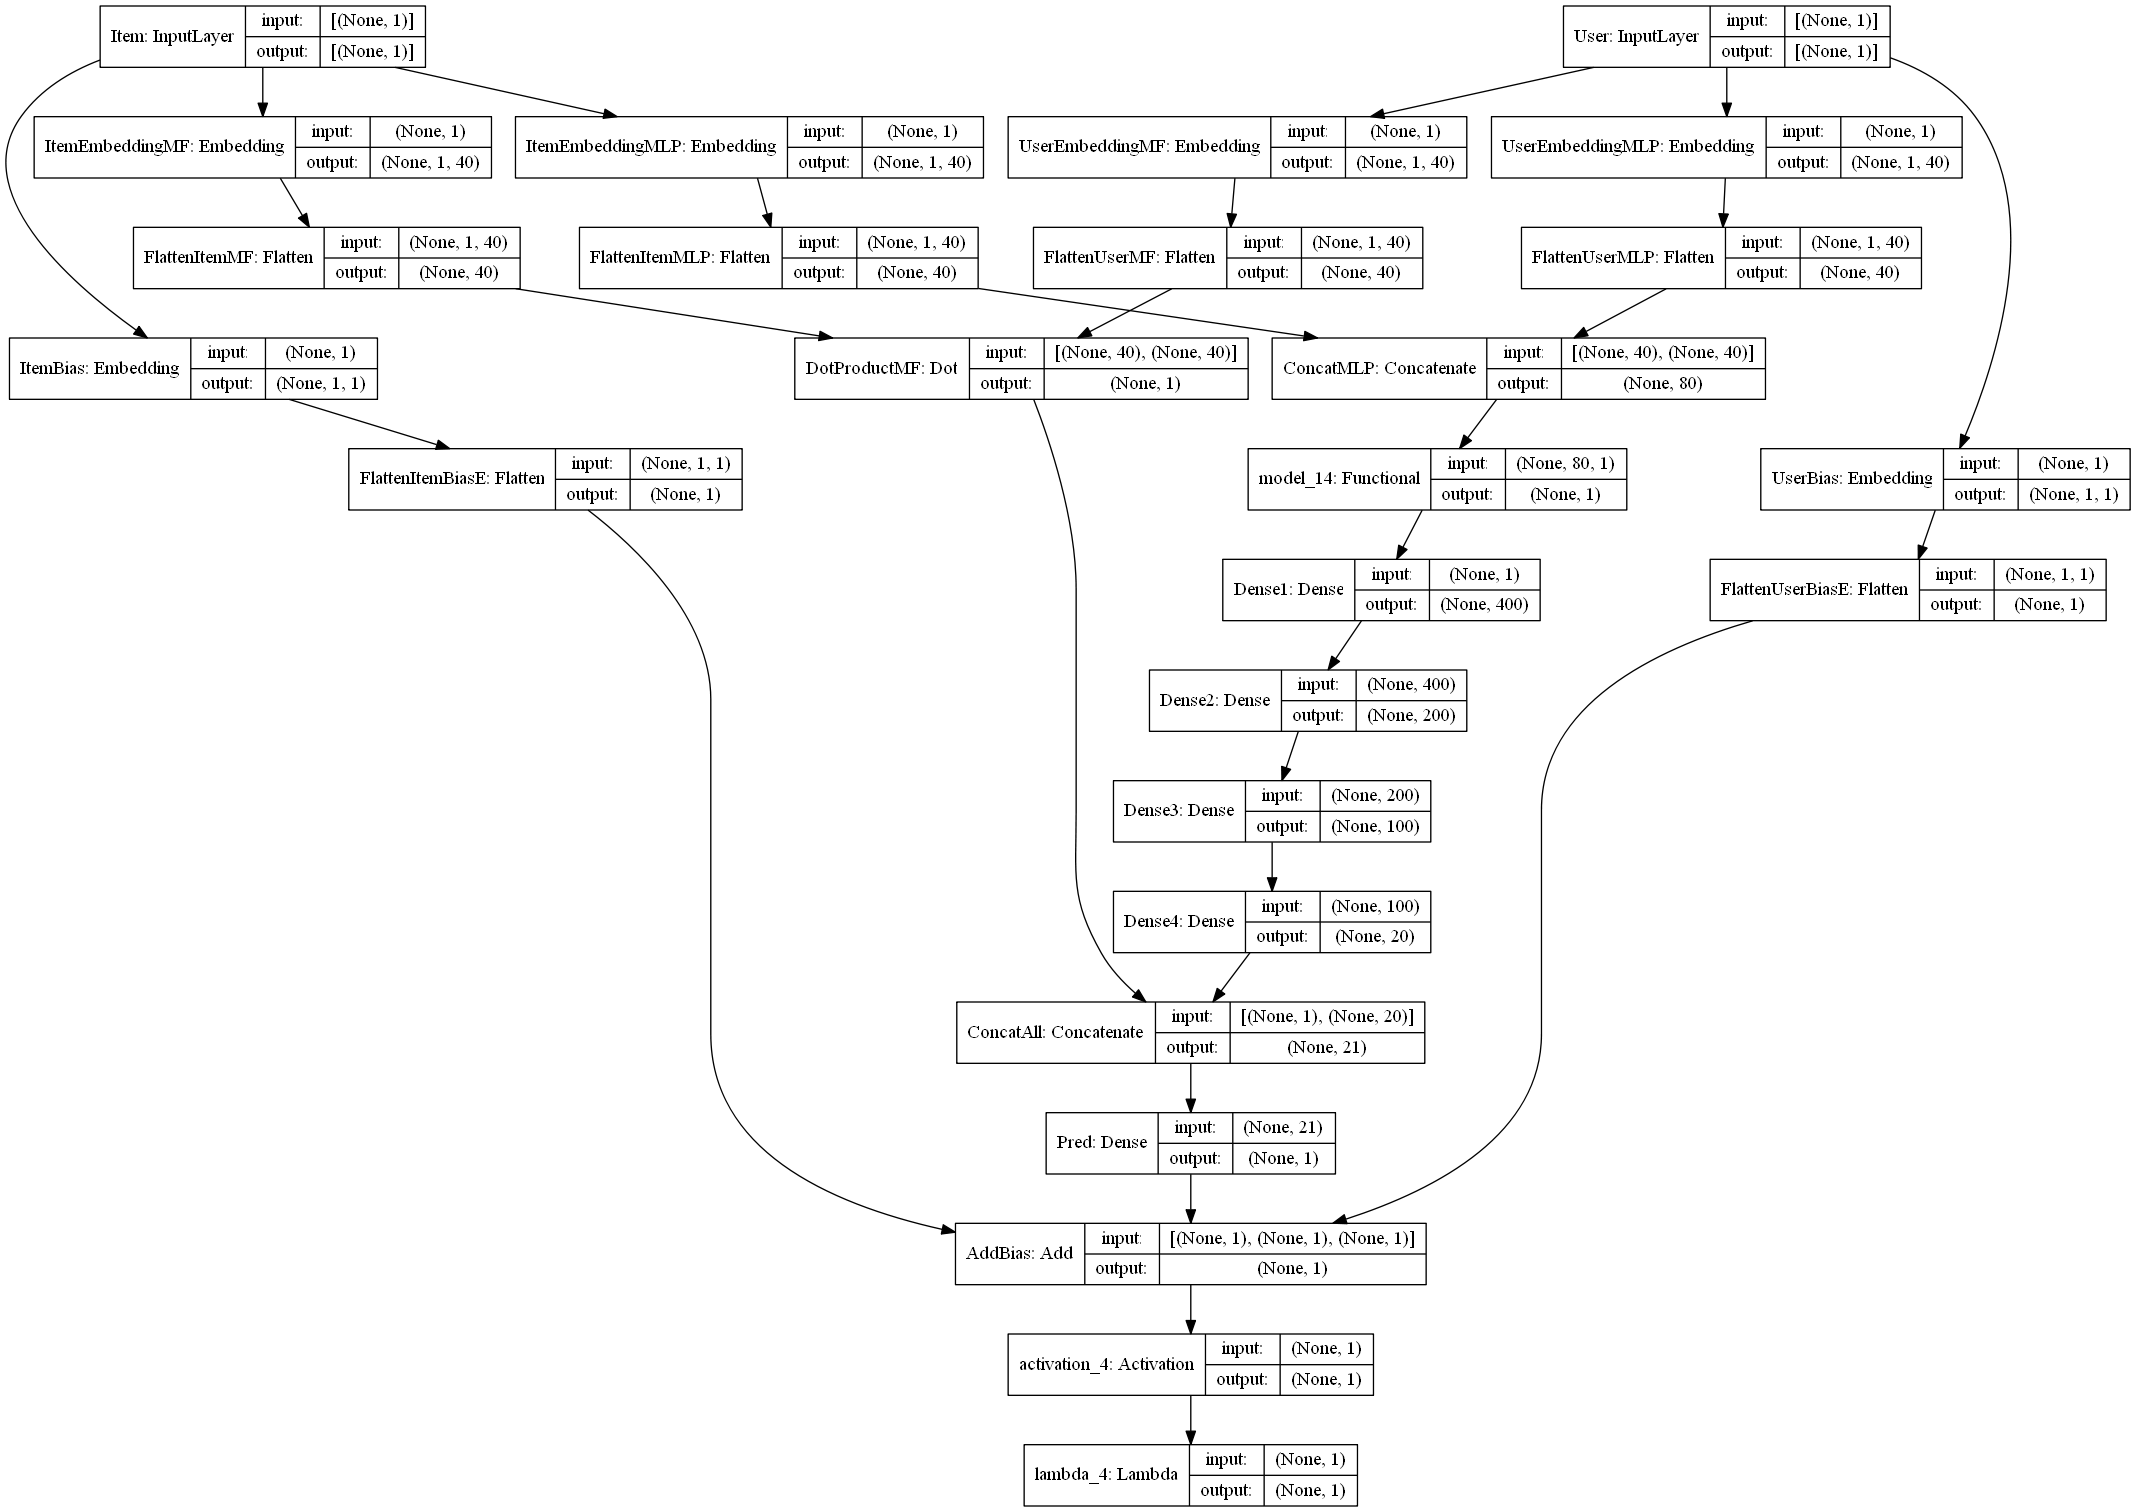

In [158]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file="model-img/Deep-CF.png" )

In [159]:

%%time
output = model.fit([train.USER, train.ITEM], train.RATING, 
                                  batch_size=128, epochs=8, verbose=1, 
                   validation_data= ([test.USER, test.ITEM], test.RATING))

#new_X = extraction_model.predict(X) # (n_sample, hidden_dim)

# fit a tabular model
#rf = CatBoostClassifier()

#rf.fit(new_X, y)
#print(rf.score(new_X, y))

Epoch 1/8
7033/7033 [==============================] - 171s 24ms/step - loss: 2949332480.0000 - val_loss: 301383328.0000
Epoch 2/8
7033/7033 [==============================] - 173s 25ms/step - loss: 1085141120.0000 - val_loss: 342499008.0000
Epoch 3/8
7033/7033 [==============================] - 171s 24ms/step - loss: 1039979776.0000 - val_loss: 270805600.0000
Epoch 4/8
7033/7033 [==============================] - 163s 23ms/step - loss: 1017628672.0000 - val_loss: 349232224.0000
Epoch 5/8
7033/7033 [==============================] - 167s 24ms/step - loss: 1011828160.0000 - val_loss: 280780000.0000
Epoch 6/8
7033/7033 [==============================] - 172s 24ms/step - loss: 992174784.0000 - val_loss: 353419936.0000
Epoch 7/8
7033/7033 [==============================] - 170s 24ms/step - loss: 991756096.0000 - val_loss: 303124384.0000
Epoch 8/8
7033/7033 [==============================] - 163s 23ms/step - loss: 989886208.0000 - val_loss: 342498336.0000
Wall time: 22min 30s


In [160]:
vis.metrics(output.history)

alt.FacetChart(...)

In [161]:
from evaluate import get_embedding, get_predictions, recommend_topk
from evaluate import precision_at_k, recall_at_k, ndcg_at_k

In [162]:
item_embedding_mf = get_embedding(model, "ItemEmbeddingMF")
user_embedding_mf = get_embedding(model, "UserEmbeddingMF")
item_embedding_mlp = get_embedding(model, "ItemEmbeddingMLP")
user_embedding_mlp = get_embedding(model, "UserEmbeddingMLP")

In [163]:

item_embedding = np.mean([item_embedding_mf,item_embedding_mlp], axis=0)
user_embedding = np.mean([user_embedding_mf,user_embedding_mlp], axis=0)

In [164]:
dd = model.predict

In [165]:
output

In [166]:
%%time
predictions = get_predictions(model, DATA[0:100])

Wall time: 515 ms


In [167]:
predictions.head()

,USER,ITEM,RATING_PRED
0,2,0,38544.0
1,2,237,45760.0
2,3,0,1858.0
3,3,237,11512.0


In [ ]:
def Neural_CF(n_users, n_items, n_factors):
    
     # Технологии IPO ID
    #techno_input = Input(shape=[1], name='techno')
    
    # Роботы ID - embedings
    #techno_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
     #                             embeddings_initializer='he_normal',
     #                             name='ItemEmbeddingMF')(item_input)
    #techno_vec_mf = Flatten(name='FlattenItemMF')( techno_embedding_mf) # 1 мерный
    # Роботы ID MLP
   # techno_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
    #                            embeddings_initializer='he_normal',
    #                           name='ItemEmbeddingMLP')(item_input)
    #techno_vec_mlp = Flatten(name='FlattenItemMLP')( techno_embedding_mlp)
    
    
    
    
    # Роботы ID
    item_input = Input(shape=[1], name='Item')
    
    # Роботы ID - embedings
    item_embedding_mf = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                  embeddings_initializer='he_normal',
                                  name='ItemEmbeddingMF')(item_input)
    item_vec_mf = Flatten(name='FlattenItemMF')(item_embedding_mf) # 1 мерный
    
    
    # Роботы ID MLP
    item_embedding_mlp = Embedding(n_items, n_factors, embeddings_regularizer=l2(1e-6),
                                embeddings_initializer='he_normal',
                               name='ItemEmbeddingMLP')(item_input)
    item_vec_mlp = Flatten(name='FlattenItemMLP')(item_embedding_mlp)
    

    # Пользователи или Login
    user_input = Input(shape=[1], name='User')
    
    # Пользователи факторизация Embedding MF
    user_embedding_mf = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6), 
                                embeddings_initializer='he_normal',
                               name='UserEmbeddingMF')(user_input)
    user_vec_mf = Flatten(name='FlattenUserMF')(user_embedding_mf)
    
    # Пользователи Embedding MF
    user_embedding_mlp = Embedding(n_users, n_factors, embeddings_regularizer=l2(1e-6),
                               embeddings_initializer='he_normal',
                               name='UserEmbeddingMLP')(user_input)
    user_vec_mlp = Flatten(name='FlattenUserMLP')(user_embedding_mlp)
    
    # Скаларное умножение путей факторизации для построения  MF paths
    DotProductMF = Dot(axes=1, name='DotProductMF')([item_vec_mf, user_vec_mf])
    
    # Интеграция MLP путей - для предваритьельного вывода
    ConcatMLP = Concatenate(name='ConcatMLP')([item_vec_mlp, user_vec_mlp])
    #
    # Вызов слоя attention !!!!!!!!!!!!!!!!!!
    #TF = tf.strings.as_string(ConcatMLP)

   
    MA = model_attention(ConcatMLP)
    Dense_1 = Dense(400, name="Dense1")(MA)
    Dense_2 = Dense(200, name="Dense2")(Dense_1)
    Dense_3 = Dense(100, name="Dense3")(Dense_2)
    Dense_4 = Dense(20, name="Dense4")(Dense_3)

    # Финальная интеграция MF MLP 
    Concat = Concatenate(name="ConcatAll")([DotProductMF, Dense_4])
    
    # Dense
    Pred = Dense(1, name="Pred")(Concat)
    

    #  Ролболты - Bias
    item_bias = Embedding(n_items, 1, embeddings_regularizer=l2(1e-5), name='ItemBias')(item_input)
    item_bias_vec = Flatten(name='FlattenItemBiasE')(item_bias)

    # Пользовательский  Bias
    user_bias = Embedding(n_users, 1, embeddings_regularizer=l2(1e-5), name='UserBias')(user_input)
    user_bias_vec = Flatten(name='FlattenUserBiasE')(user_bias)

    # Предскзание с калибровкой
    PredAddBias = Add(name="AddBias")([Pred, item_bias_vec, user_bias_vec])
    
    
    # Масштабирование
    y = Activation('sigmoid')(PredAddBias)
    rating_output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(y)
    
    # Модель
    model = Model([user_input, item_input], rating_output)
    
    # Компиляция
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model